####ML PROJECT


#### Data-Driven Air Pollution Assessment for Environmental Solutions in Almaty





#### Team:
####     Algashbekova Nazerke
####     Tynyshtybay Assem
####     Sauirbaev Akezhan
####    Kumarova Ingkar
####     Azizov Timur




In [1]:
import pandas as pd
import numpy as np

In [2]:
df_csv = pd.read_csv("almaty_airQuality.csv")
df_csv

date  pm25  pm10   no2  so2   co
0     2024/12/1    58    23   125    2    5
1     2024/12/2    53    35    47    1    5
2     2024/12/3    74    54          1    5
3     2024/12/4    89    74          1   10
4     2024/12/5   130    67          1   11
...         ...   ...   ...   ...  ...  ...
1754  2021/6/28          13    20    1    4
1755  2021/6/29          28    26    1    5
1756  2021/6/30          31    26    2    4
1757  2023/9/26                13    1    8
1758   2021/9/8                35    2    5

[1759 rows x 6 columns]

In [3]:
df_excel = pd.read_excel("meteoData.xlsx")

In [4]:
df_excel.columns = ['date', 'temperature', 'humidity', 'wind']

# Display the updated DataFrame
print("Updated Column Names:", df_excel.columns)

Updated Column Names: Index(['date', 'temperature', 'humidity', 'wind'], dtype='object')


In [5]:
df_excel

date temperature  humidity  wind
0    2020-02-01       -28.3        73   0.0
1    2020-02-02       -22.3        73   0.8
2    2020-02-03         -21        73   0.3
3    2020-02-04       -10.6        78   0.0
4    2020-02-05        -7.3        82   0.4
...         ...         ...       ...   ...
1699 2024-09-26         7.1        56   2.1
1700 2024-09-27         3.4        61   1.9
1701 2024-09-28         3.7        58   1.4
1702 2024-09-29         2.7        56   2.0
1703 2024-09-30         4.9        55   1.9

[1704 rows x 4 columns]

**PM2.5** refers to fine particles smaller than 2.5 micrometers, primarily from vehicle emissions, industrial activity, and wildfires.
**PM10** includes particles smaller than 10 micrometers, often from dust, construction, and combustion.

**NO₂** is a gas produced by vehicle and industrial emissions, which can irritate the lungs. **SO₂** comes from burning fossil fuels and industrial processes, contributing to acid rain and respiratory issues.

**CO** is a harmful gas from incomplete combustion, affecting oxygen delivery in the body. **Temperature**, **humidity**, and **wind** influence pollutant dispersion; higher temperatures and humidity can increase pollutant concentration, while wind helps disperse pollutants.

In [6]:
# Ensure the common column (e.g., 'date') is in the correct format
df_csv['date'] = pd.to_datetime(df_csv['date'], errors='coerce')
df_excel['date'] = pd.to_datetime(df_excel['date'], errors='coerce')

# Merge the DataFrames
merged_df = pd.merge(df_csv, df_excel, on='date', how='inner')  # Use 'outer', 'left', or 'right' as needed

# Display the merged DataFrame
print("Merged Data:")
print(merged_df)

Merged Data:
           date  pm25  pm10  no2  so2  co temperature  humidity  wind
0    2024-07-01    44    16    2    1   3        21.8        67   0.5
1    2024-07-02    40    17    4    1   3        20.5        61   0.5
2    2024-07-03    40    14    5    1   3        16.1        74   1.4
3    2024-07-04    36    52    5    1   4        17.1        80   0.4
4    2024-07-05    74    10    2    1   4        17.1        80   0.8
...         ...   ...   ...  ...  ...  ..         ...       ...   ...
1675 2021-06-28          13   20    1   4        18.5        48   1.5
1676 2021-06-29          28   26    1   5        19.9        48   0.8
1677 2021-06-30          31   26    2   4        22.9        44   4.1
1678 2023-09-26               13    1   8         8.5        70   3.1
1679 2021-09-08               35    2   5        21.7        45   1.1

[1680 rows x 9 columns]


 ### Clean and preparing data


In [7]:
print("Missing values in merged DataFrame:")
print(merged_df.isnull().sum())


Missing values in merged DataFrame:
date           0
 pm25          0
 pm10          0
 no2           0
 so2           0
 co            0
temperature    0
humidity       0
wind           0
dtype: int64


In [9]:
from sklearn.impute import KNNImputer
# KNN Imputation
for column in columns_to_impute:
    merged_df[column] = pd.to_numeric(merged_df[column].str.strip(), errors='coerce')

# KNN Imputation (after converting to numeric)
imputer = KNNImputer(n_neighbors=5)
merged_df[columns_to_impute] = imputer.fit_transform(merged_df[columns_to_impute])

In [10]:
print("Merged Data:")
print(merged_df)

Merged Data:
           date   pm25   pm10   no2   so2   co temperature  humidity  wind
0    2024-07-01   44.0   16.0   2.0   1.0  3.0        21.8        67   0.5
1    2024-07-02   40.0   17.0   4.0   1.0  3.0        20.5        61   0.5
2    2024-07-03   40.0   14.0   5.0   1.0  3.0        16.1        74   1.4
3    2024-07-04   36.0   52.0   5.0   1.0  4.0        17.1        80   0.4
4    2024-07-05   74.0   10.0   2.0   1.0  4.0        17.1        80   0.8
...         ...    ...    ...   ...   ...  ...         ...       ...   ...
1675 2021-06-28   73.4   13.0  20.0   1.0  4.0        18.5        48   1.5
1676 2021-06-29   77.4   28.0  26.0   1.0  5.0        19.9        48   0.8
1677 2021-06-30   94.4   31.0  26.0   2.0  4.0        22.9        44   4.1
1678 2023-09-26  112.8   41.8  13.0   1.0  8.0         8.5        70   3.1
1679 2021-09-08   47.4   20.6  35.0   2.0  5.0        21.7        45   1.1

[1680 rows x 9 columns]


In [11]:
print("Missing values in merged DataFrame:")
print(merged_df.isnull().sum())


Missing values in merged DataFrame:
date           0
 pm25          0
 pm10          0
 no2           0
 so2           0
 co            0
temperature    0
humidity       0
wind           0
dtype: int64


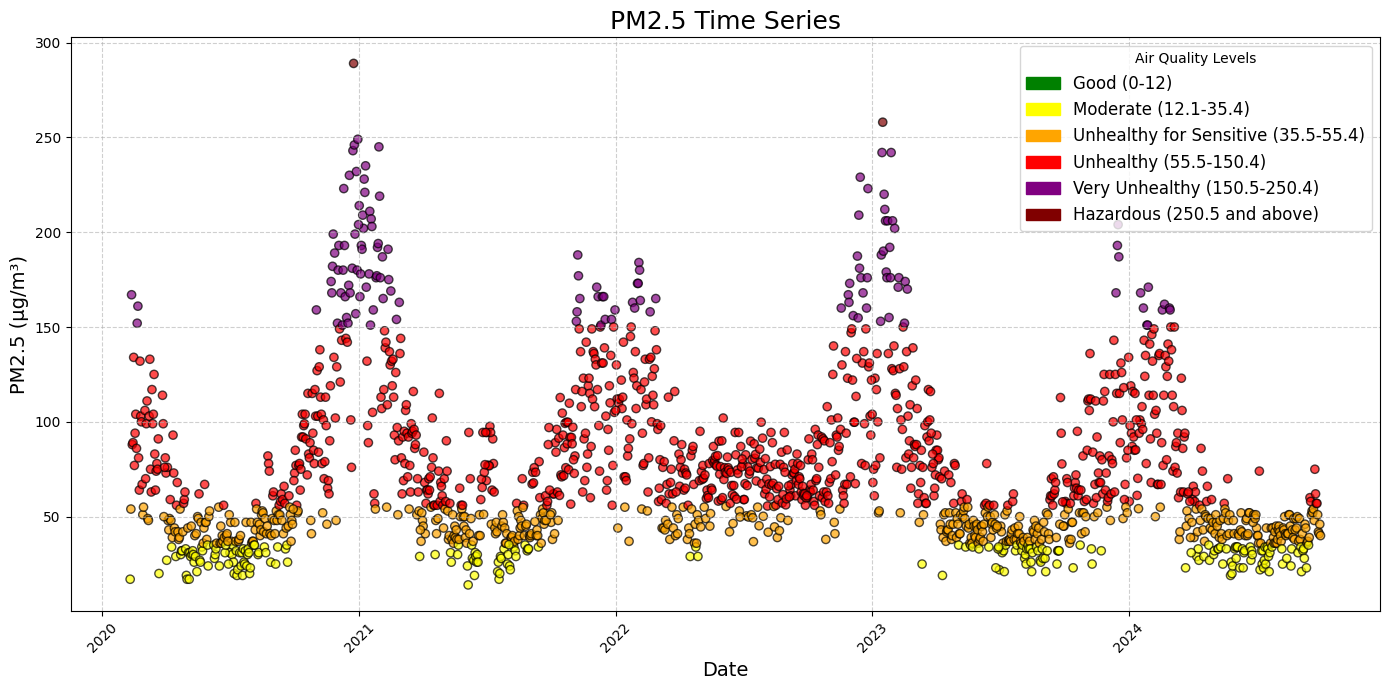

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Function to determine color based on PM2.5 concentration
def get_color(pm25_value):
    if pm25_value <= 12:
        return 'green'
    elif pm25_value <= 35.4:
        return 'yellow'
    elif pm25_value <= 55.4:
        return 'orange'
    elif pm25_value <= 150.4:
        return 'red'
    elif pm25_value <= 250.4:
        return 'purple'
    else:
        return 'maroon'

merged_df['color'] = merged_df[' pm25'].apply(get_color)

plt.figure(figsize=(14, 7))
plt.scatter(merged_df['date'], merged_df[' pm25'], c=merged_df['color'], label='PM2.5', edgecolor='k', alpha=0.7)

# Setting axes and title
plt.title('PM2.5 Time Series', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('PM2.5 (µg/m³)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Legend for air quality levels
import matplotlib.patches as mpatches
legend_patches = [
    mpatches.Patch(color='green', label='Good (0-12)'),
    mpatches.Patch(color='yellow', label='Moderate (12.1-35.4)'),
    mpatches.Patch(color='orange', label='Unhealthy for Sensitive (35.5-55.4)'),
    mpatches.Patch(color='red', label='Unhealthy (55.5-150.4)'),
    mpatches.Patch(color='purple', label='Very Unhealthy (150.5-250.4)'),
    mpatches.Patch(color='maroon', label='Hazardous (250.5 and above)')
]
plt.legend(handles=legend_patches, title='Air Quality Levels', fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()


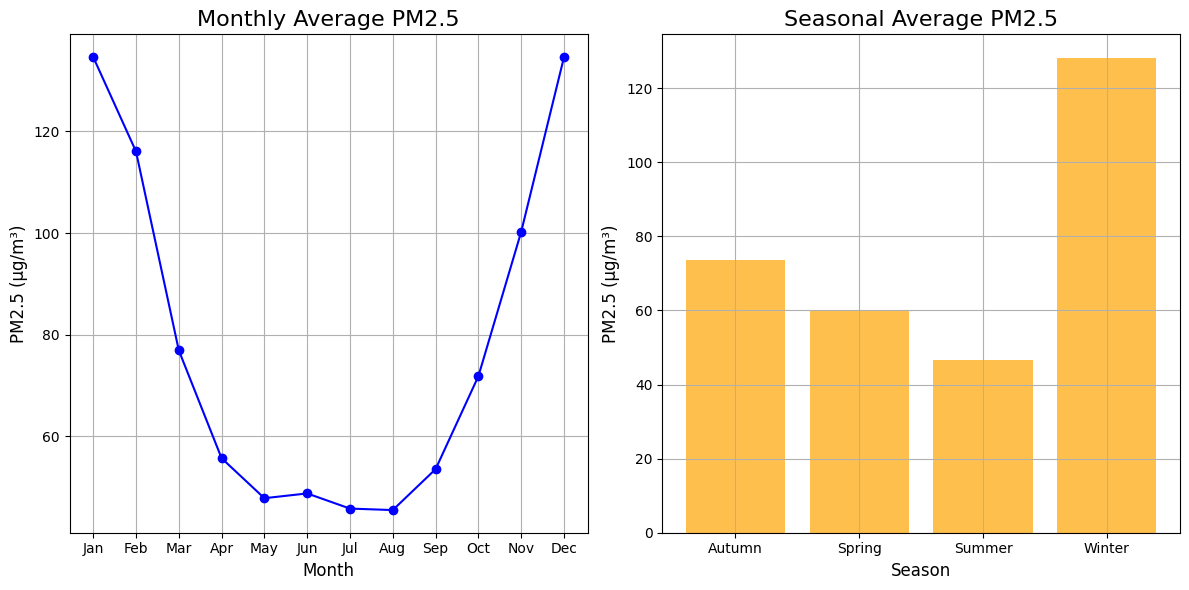

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df['month'] = merged_df['date'].dt.month
merged_df['season'] = merged_df['month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2] else
    'Spring' if x in [3, 4, 5] else
    'Summer' if x in [6, 7, 8] else
    'Autumn'
)

monthly_pm25 = merged_df.groupby('month')[' pm25'].mean()
seasonal_pm25 = merged_df.groupby('season')[' pm25'].mean()

# Plotting the data
plt.figure(figsize=(12, 6))

# Plot monthly PM2.5
plt.subplot(1, 2, 1)
plt.plot(monthly_pm25.index, monthly_pm25.values, marker='o', color='b', label='Monthly Average PM2.5')
plt.title('Monthly Average PM2.5', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('PM2.5 (µg/m³)', fontsize=12)
plt.xticks(monthly_pm25.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Plot seasonal PM2.5
plt.subplot(1, 2, 2)
plt.bar(seasonal_pm25.index, seasonal_pm25.values, color='orange', alpha=0.7)
plt.title('Seasonal Average PM2.5', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('PM2.5 (µg/m³)', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()


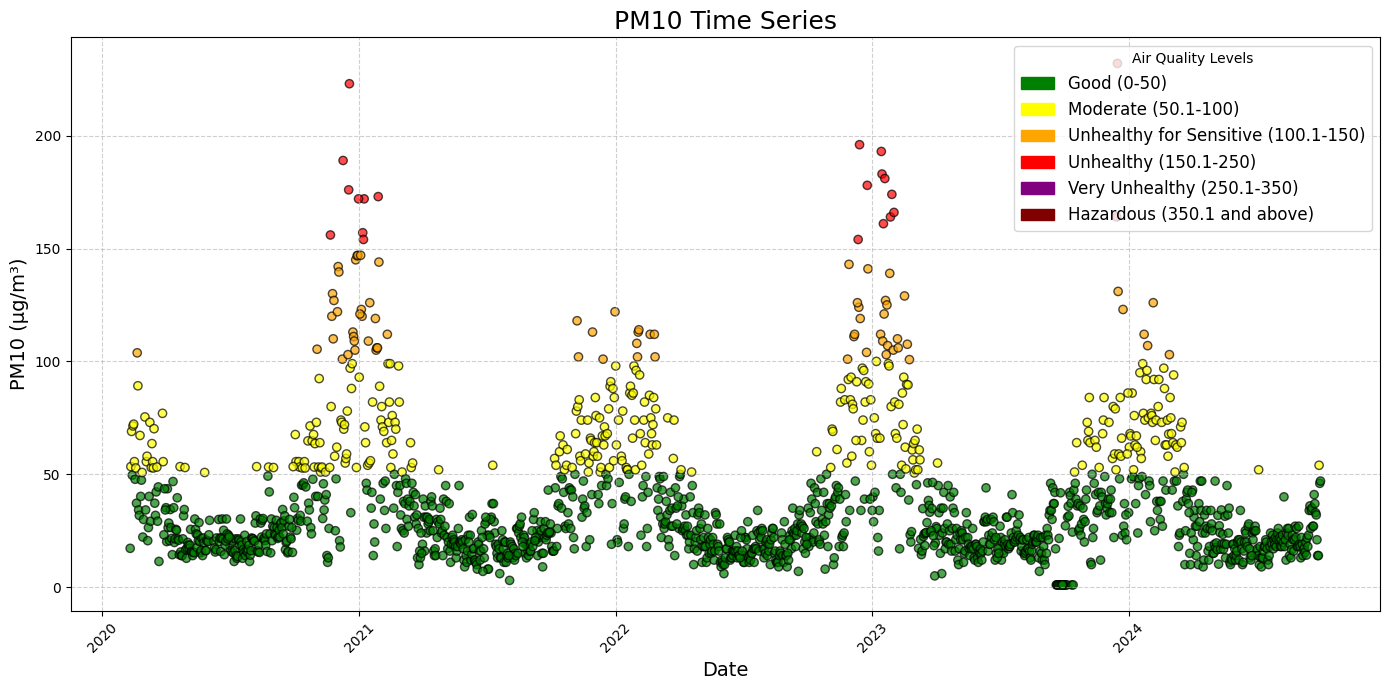

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches

merged_df['date'] = pd.to_datetime(merged_df['date'])

# Function to determine color based on PM10 concentration
def get_color(pm10_value):
    if pm10_value <= 50:
        return 'green'
    elif pm10_value <= 100:
        return 'yellow'
    elif pm10_value <= 150:
        return 'orange'
    elif pm10_value <= 250:
        return 'red'
    elif pm10_value <= 350:
        return 'purple'
    else:
        return 'maroon'


merged_df['color'] = merged_df[' pm10'].apply(get_color)
plt.figure(figsize=(14, 7))
plt.scatter(merged_df['date'], merged_df[' pm10'], c=merged_df['color'], label='PM10', edgecolor='k', alpha=0.7)
plt.title('PM10 Time Series', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('PM10 (µg/m³)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Legend for air quality levels
legend_patches = [
    mpatches.Patch(color='green', label='Good (0-50)'),
    mpatches.Patch(color='yellow', label='Moderate (50.1-100)'),
    mpatches.Patch(color='orange', label='Unhealthy for Sensitive (100.1-150)'),
    mpatches.Patch(color='red', label='Unhealthy (150.1-250)'),
    mpatches.Patch(color='purple', label='Very Unhealthy (250.1-350)'),
    mpatches.Patch(color='maroon', label='Hazardous (350.1 and above)')
]
plt.legend(handles=legend_patches, title='Air Quality Levels', fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()



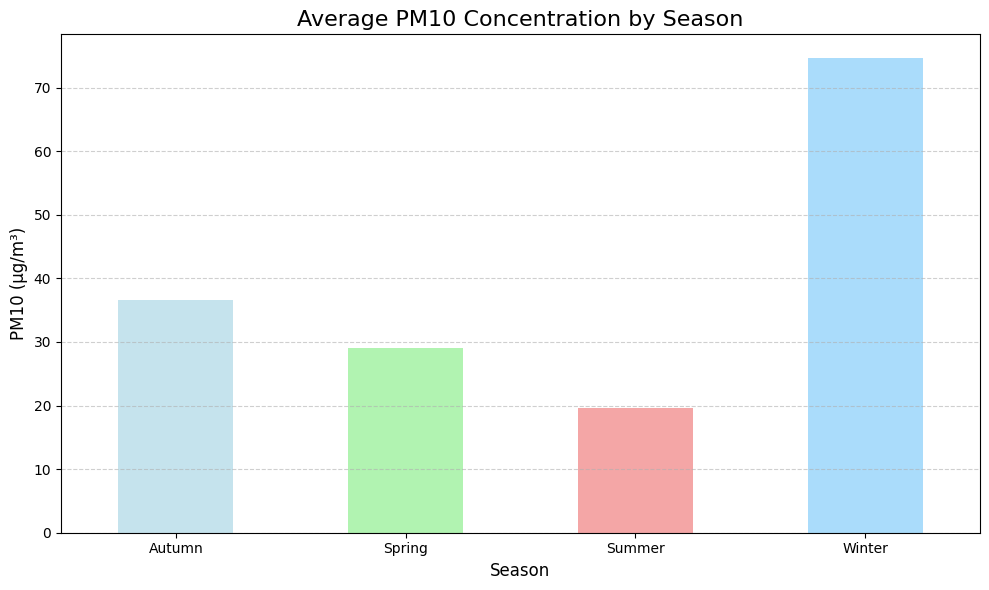

In [15]:
merged_df['month'] = merged_df['date'].dt.month
merged_df['season'] = merged_df['month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2] else
    'Spring' if x in [3, 4, 5] else
    'Summer' if x in [6, 7, 8] else
    'Autumn'
)
seasonal_pm10 = merged_df.groupby('season')[' pm10'].mean()

plt.figure(figsize=(10, 6))
seasonal_pm10.plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'], alpha=0.7)
plt.title('Average PM10 Concentration by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('PM10 (µg/m³)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


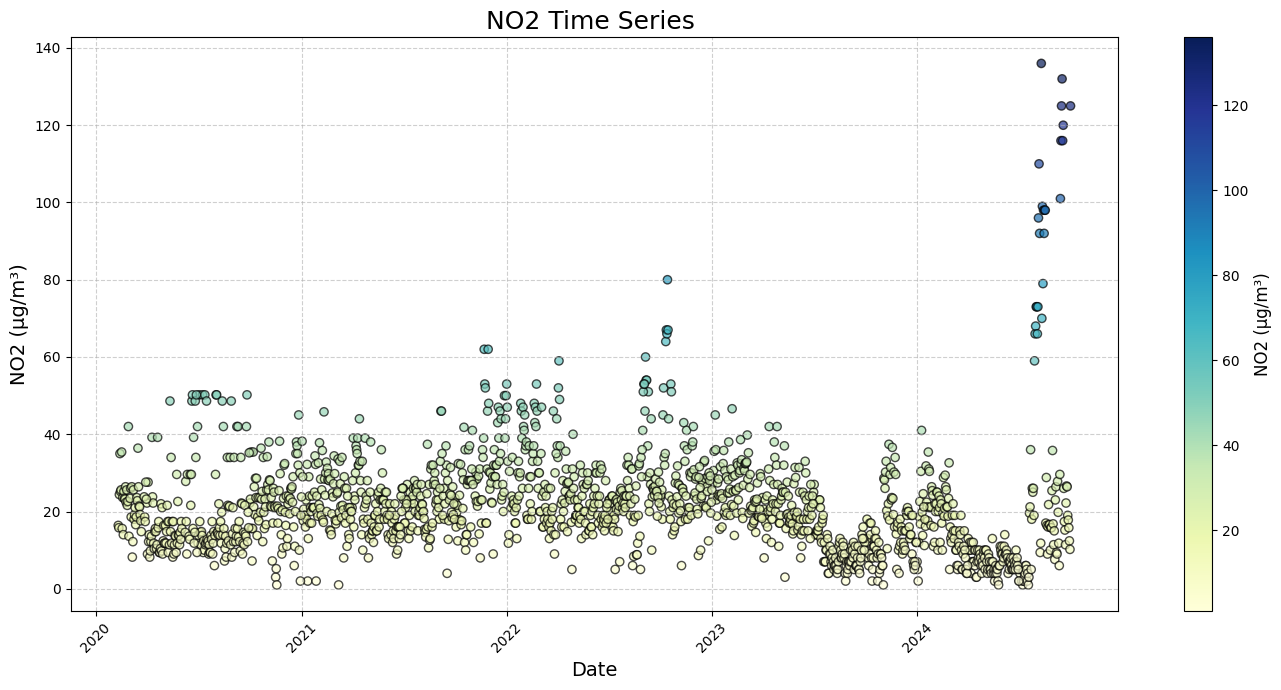

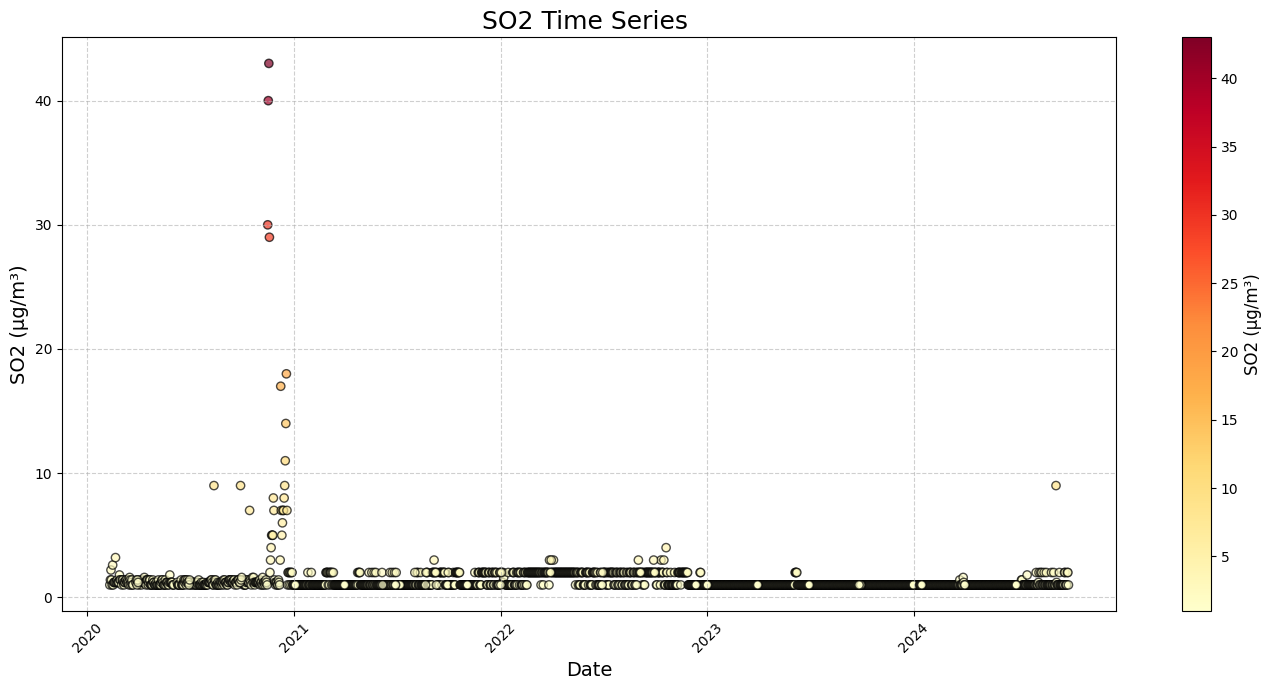

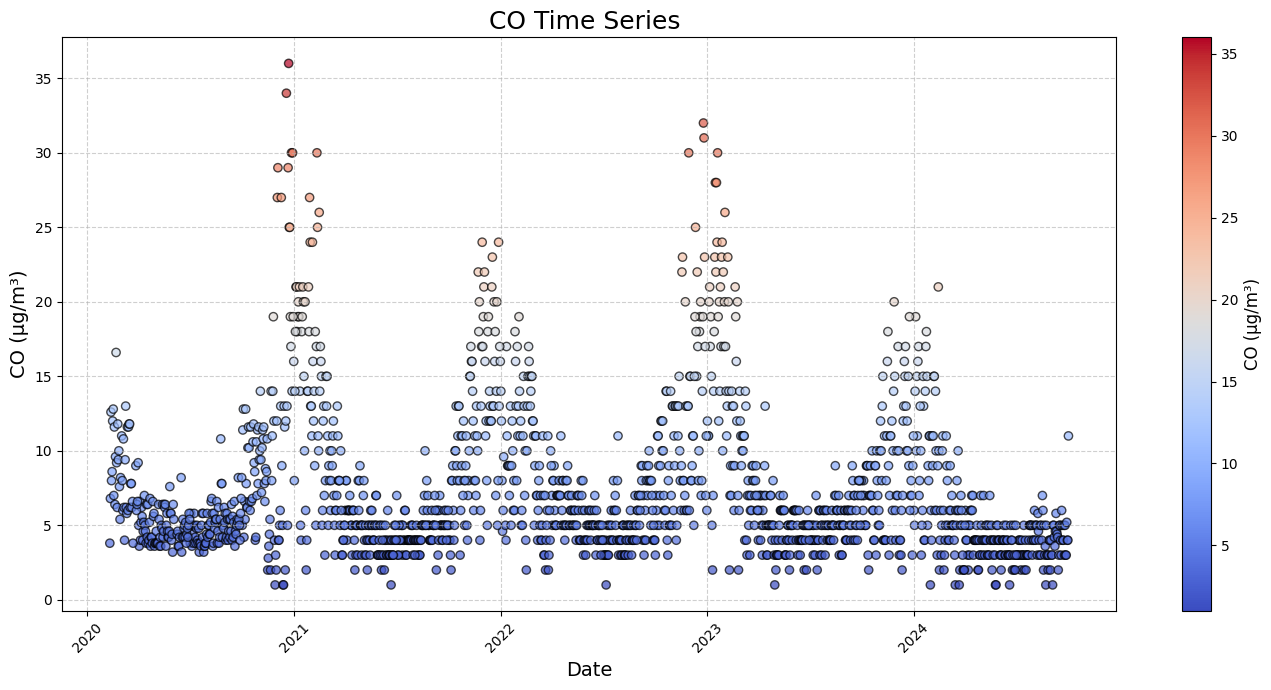

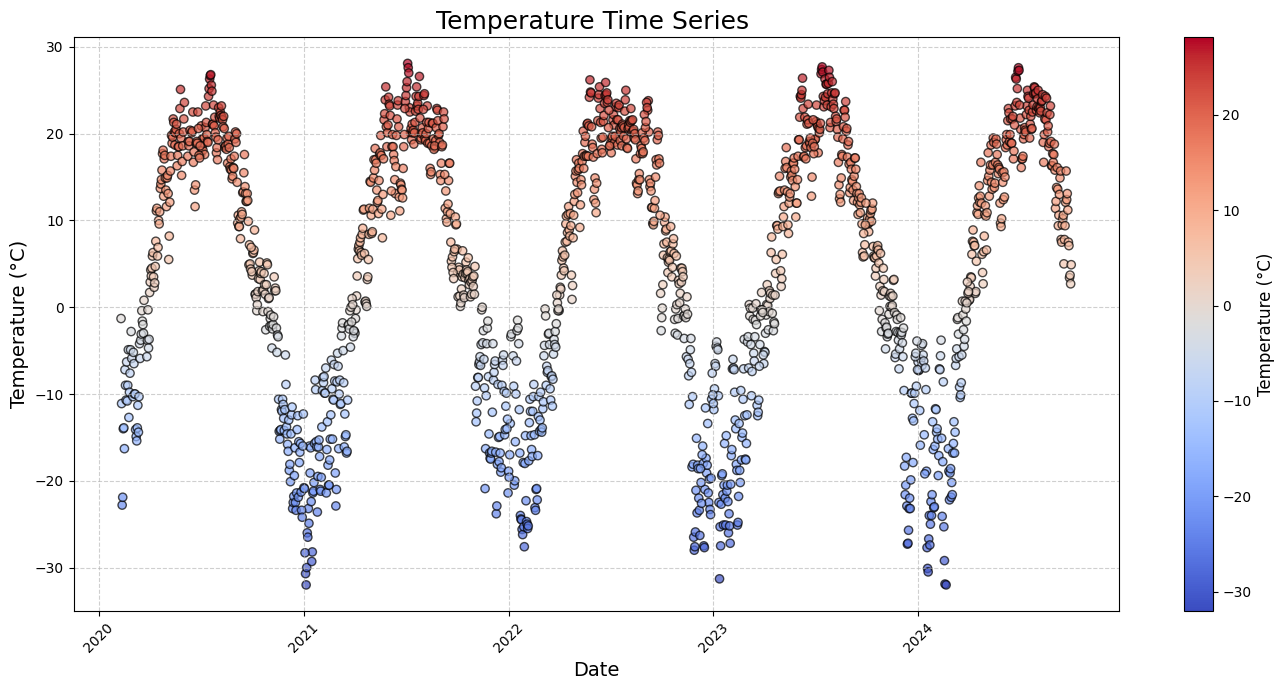

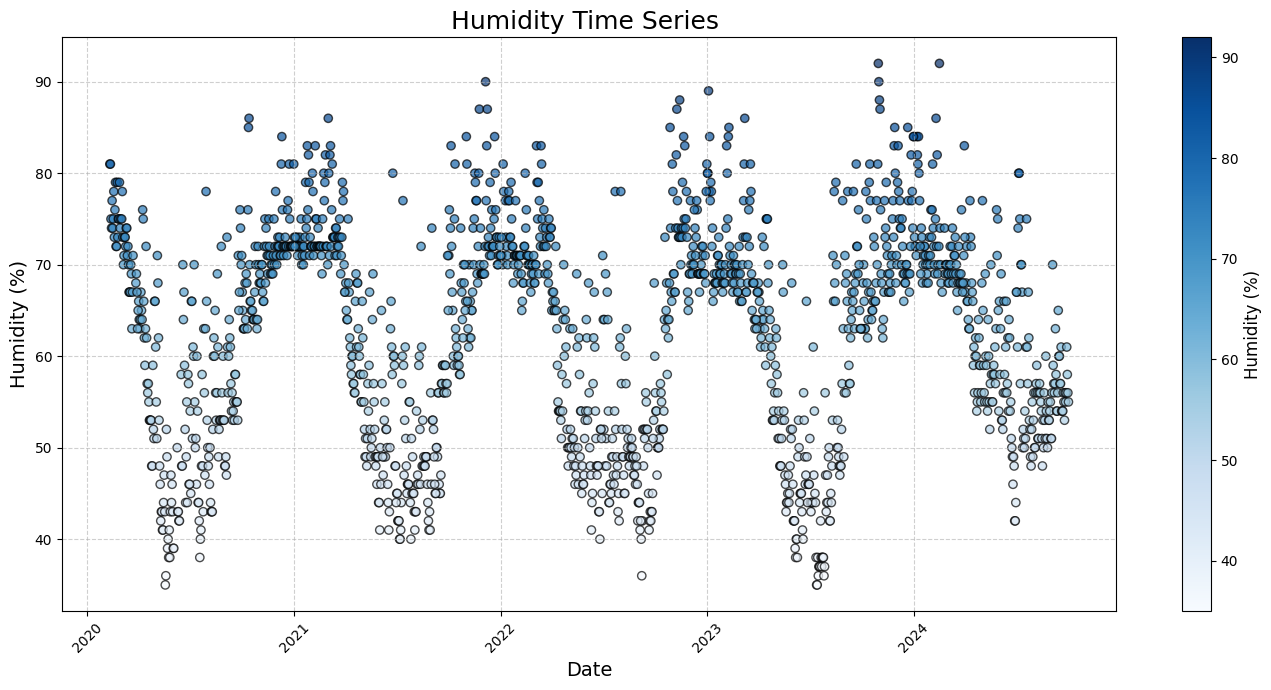

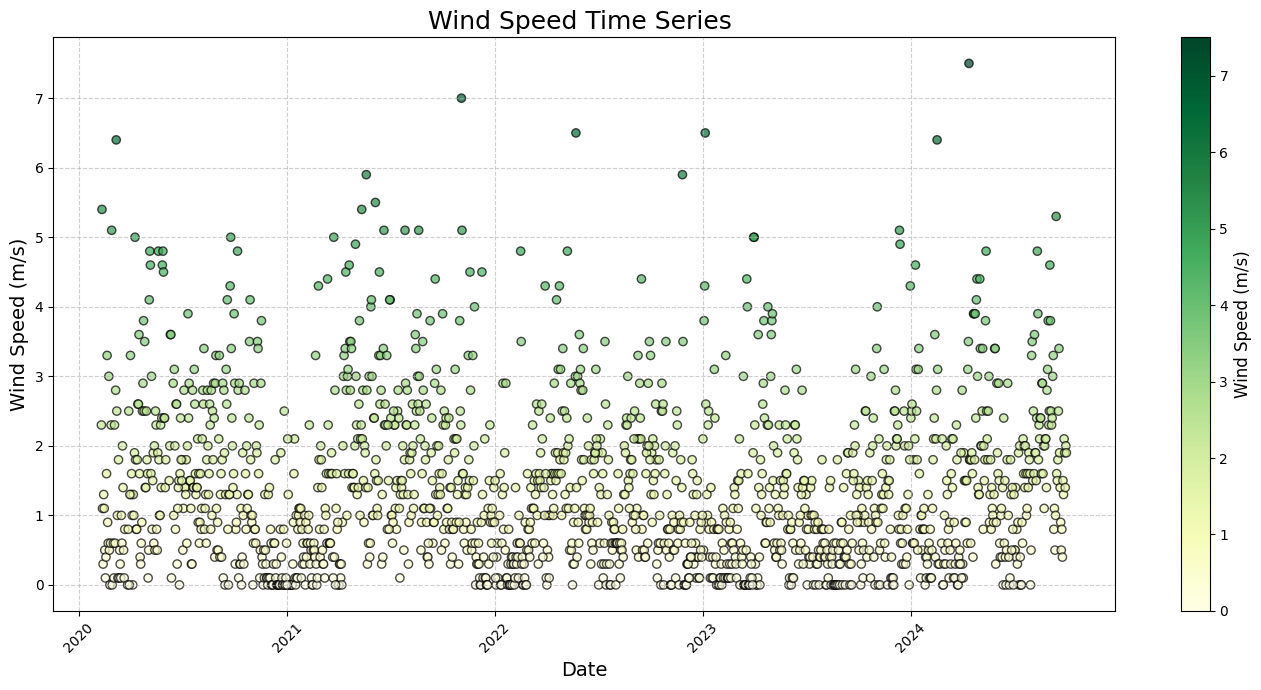

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

merged_df['date'] = pd.to_datetime(merged_df['date'])

def plot_with_gradient(parameter, colormap="RdYlBu_r", title="Time Series", ylabel="Concentration (µg/m³)"):
    # Convert the column to numeric, handling errors
    merged_df[parameter] = pd.to_numeric(merged_df[parameter], errors='coerce')

    # Drop rows with NaN values in the specified column
    merged_df.dropna(subset=[parameter], inplace=True)

    cmap = sns.color_palette(colormap, as_cmap=True)
    norm = plt.Normalize(vmin=merged_df[parameter].min(), vmax=merged_df[parameter].max())

    # Create the plot
    plt.figure(figsize=(14, 7))
    plt.scatter(merged_df['date'], merged_df[parameter], c=merged_df[parameter], cmap=cmap, norm=norm, edgecolor='k', alpha=0.7)
    plt.title(f'{title} Time Series ', fontsize=18)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), ax=plt.gca())
    cbar.set_label(ylabel, fontsize=12)
    plt.tight_layout()
    plt.show()

plot_with_gradient(' no2', colormap="YlGnBu", title="NO2", ylabel="NO2 (µg/m³)")
plot_with_gradient(' so2', colormap="YlOrRd", title="SO2", ylabel="SO2 (µg/m³)")
plot_with_gradient(' co', colormap="coolwarm", title="CO", ylabel="CO (µg/m³)")
plot_with_gradient('temperature', colormap="coolwarm", title="Temperature", ylabel="Temperature (°C)")
plot_with_gradient('humidity', colormap="Blues", title="Humidity", ylabel="Humidity (%)")
plot_with_gradient('wind', colormap="YlGn", title="Wind Speed", ylabel="Wind Speed (m/s)")

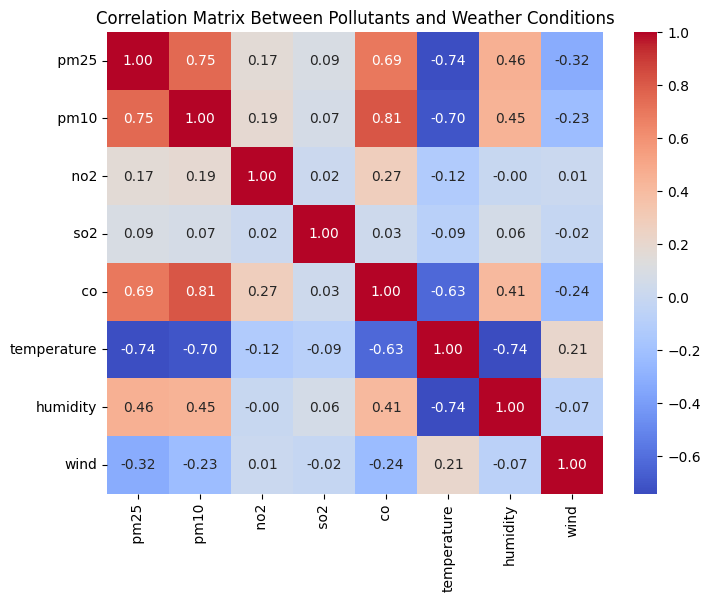

In [ ]:
import seaborn as sns
correlation_matrix = merged_df[[' pm25', ' pm10', ' no2', ' so2', ' co', 'temperature', 'humidity', 'wind']].corr()

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Between Pollutants and Weather Conditions')
plt.show()


### Strong Positive Correlations
#### PM10 and CO: Correlation = 0.78
Indicates that pm10 and co levels tend to increase together, suggesting they may have similar emission sources (e.g., vehicle emissions, industrial pollution).
#### PM25 and PM10: Correlation = 0.67
These two particulate matter pollutants are strongly correlated, which is expected as they often share common sources.
#### PM25 and CO: Correlation = 0.63
A moderate positive correlation suggests that higher PM2.5 levels coincide with increased CO concentrations.

### Negative Correlations
#### Temperature and PM25: Correlation = -0.72
Higher temperatures are associated with lower PM2.5 levels, possibly due to better atmospheric dispersion during warmer conditions.
#### Temperature and PM10: Correlation = -0.66
Similar to PM2.5, higher temperatures lead to a reduction in PM10 levels.
#### Temperature and CO: Correlation = -0.59
CO concentrations decrease as temperatures rise, which could be due to improved combustion efficiency or better atmospheric mixing.

### Key Takeaways
#### Additionally, many environmental factors like temperature, wind, and humidity show negative correlations with pollutant levels. Higher temperatures generally reduce PM2.5 and PM10 concentrations due to better atmospheric dispersion. Wind speed helps disperse pollutants, lowering their concentration in the air, while increased humidity can cause particles to settle more quickly, reducing airborne PM levels. These weather conditions often lead to improved air quality by aiding the removal or dilution of pollutants.

<Figure size 1000x600 with 0 Axes>

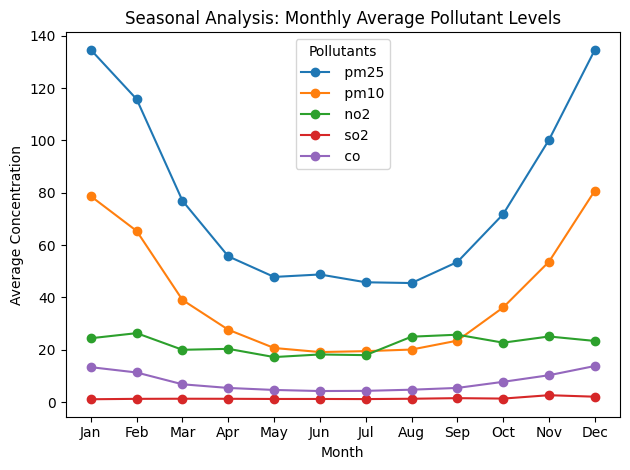

In [17]:
pollutants = [' pm25', ' pm10', ' no2', ' so2', ' co']
merged_df['month'] = merged_df['date'].dt.month
monthly_avg = merged_df.groupby('month')[pollutants].mean()

month_abbr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg.index = [month_abbr[i-1] for i in monthly_avg.index]

full_months = pd.DataFrame(index=month_abbr, columns=pollutants)
monthly_avg = full_months.combine_first(monthly_avg)

plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='line', marker='o')
plt.title('Seasonal Analysis: Monthly Average Pollutant Levels')
plt.xlabel('Month')
plt.ylabel('Average Concentration')
plt.xticks(ticks=range(12), labels=month_abbr)
plt.legend(title='Pollutants')
plt.tight_layout()
plt.show()


 ### PM2.5 and PM10 Show Clear Seasonal Patterns
#### PM2.5:
Peaks during winter months (January and December), with concentrations exceeding 130.
Declines significantly during the summer months (June to August), staying below 50.
#### PM10:
Follows a similar trend to PM2.5 but at lower concentrations.
Peaks in winter and drops significantly in spring and summer.
Reason: Winter pollution levels are often higher due to:
Increased heating emissions.
Reduced atmospheric dispersion caused by colder, stagnant air.


#### NO2 Shows Moderate Seasonality
NO2 levels remain relatively stable throughout the year with slight peaks in winter months.
Concentrations hover between 20 and 25.
Reason: NO2 emissions are linked to vehicular and industrial emissions, which do not vary significantly across seasons.

#### SO2 Levels Remain Very Low
SO2 has negligible variation throughout the year, remaining close to zero.
Reason: Low concentrations suggest that SO2 sources (e.g., sulfur-containing fuels) are either well-controlled or contribute minimally to pollution in the area.

#### CO Shows Minor Seasonality
CO levels slightly increase during winter months but remain relatively stable.
Peaks at 10–12 during January and December.
Reason: CO is emitted from combustion processes, such as vehicle emissions and heating systems, which tend to be higher in winter.

### Key Takeaways
#### Winter Months (December–February):

Significant increase in PM2.5, PM10, and CO concentrations.
Indicates stronger impacts from heating systems, stagnant air, and vehicular emissions.
#### Summer Months (June–August):
Notable reduction in PM2.5 and PM10 levels.
Improved atmospheric dispersion and reduced heating emissions likely contribute to cleaner air.
NO2 and SO2:
Show minimal seasonal variation, highlighting their relatively stable emission sources.

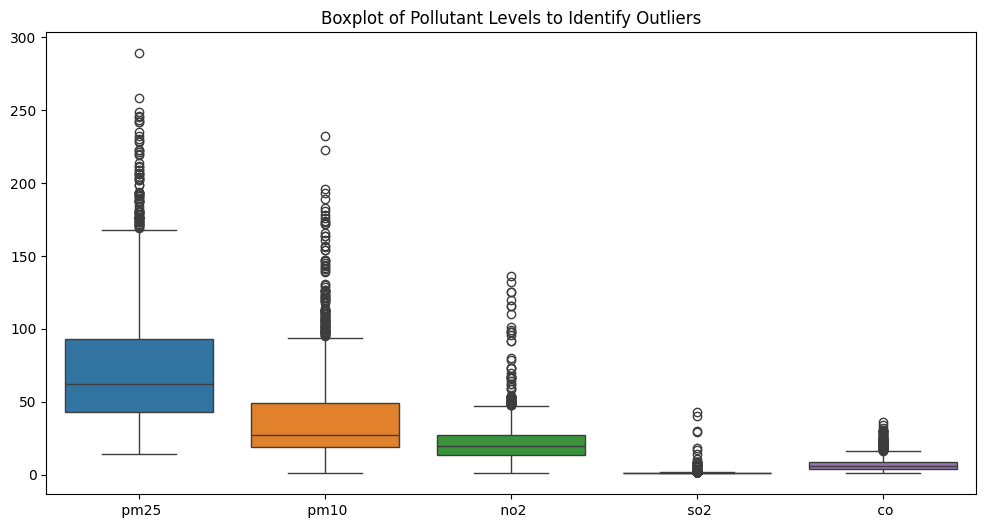

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df[pollutants])
plt.title("Boxplot of Pollutant Levels to Identify Outliers")
plt.show()

#### PM2.5 and PM10: These pollutants exhibit the most outliers, highlighting significant pollution spikes.
#### NO2 and CO: Relatively consistent with fewer outliers, suggesting stable emission patterns.
#### SO2: Minimal levels, indicating effective emission controls.

 ### Model building


SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) was chosen for its ability to model seasonal trends and incorporate external variables like temperature, humidity, and wind speed.

Key Concepts:

SARIMAX is an extension of ARIMA, incorporating seasonality and exogenous variables.

It predicts future values based on linear combinations of past values (AR), differenced values (I), and past forecast errors (MA).

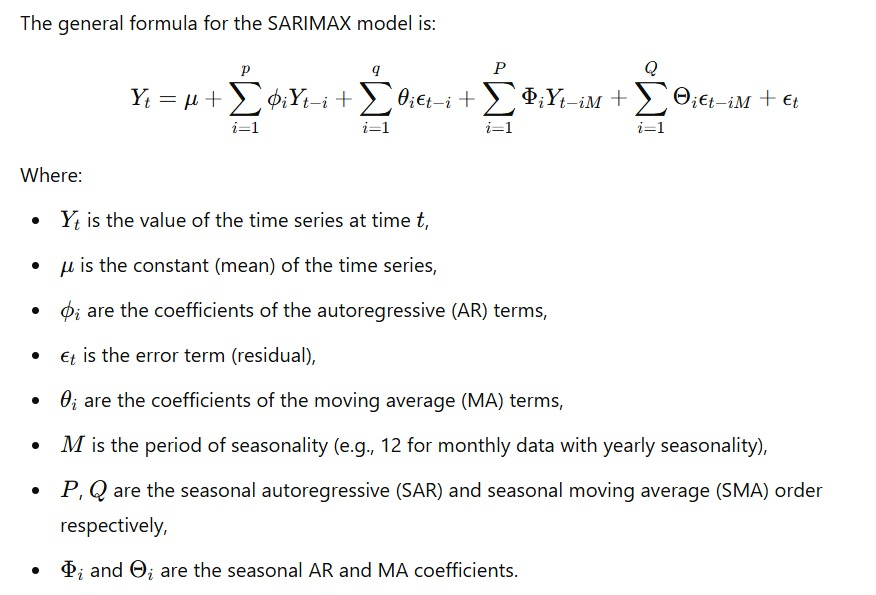

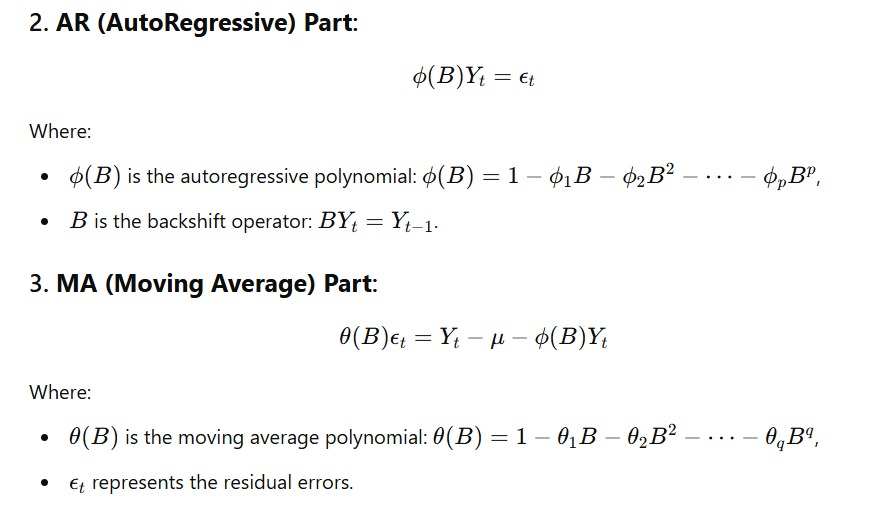

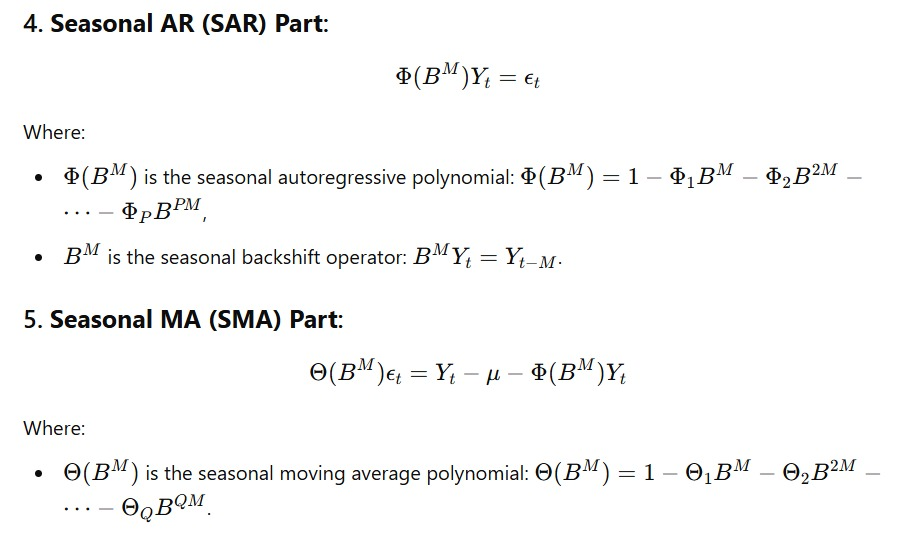

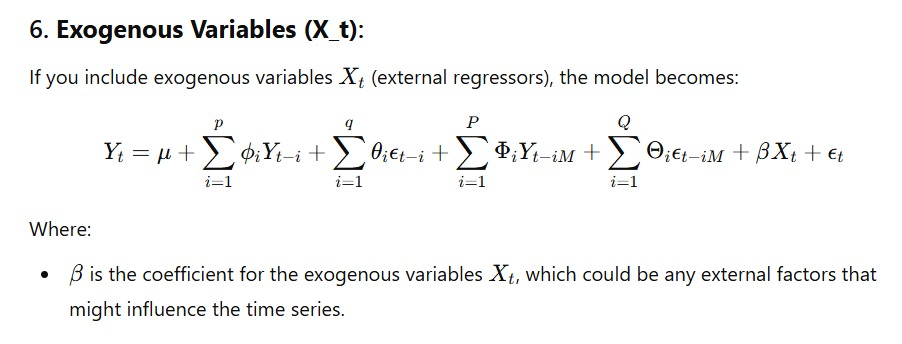


Forecasting for  pm25...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Metrics for  pm25:
MAE: 19.99309460581458, MSE: 675.6655547231466, RMSE: 25.993567564363815, R²: 0.9138101869900076


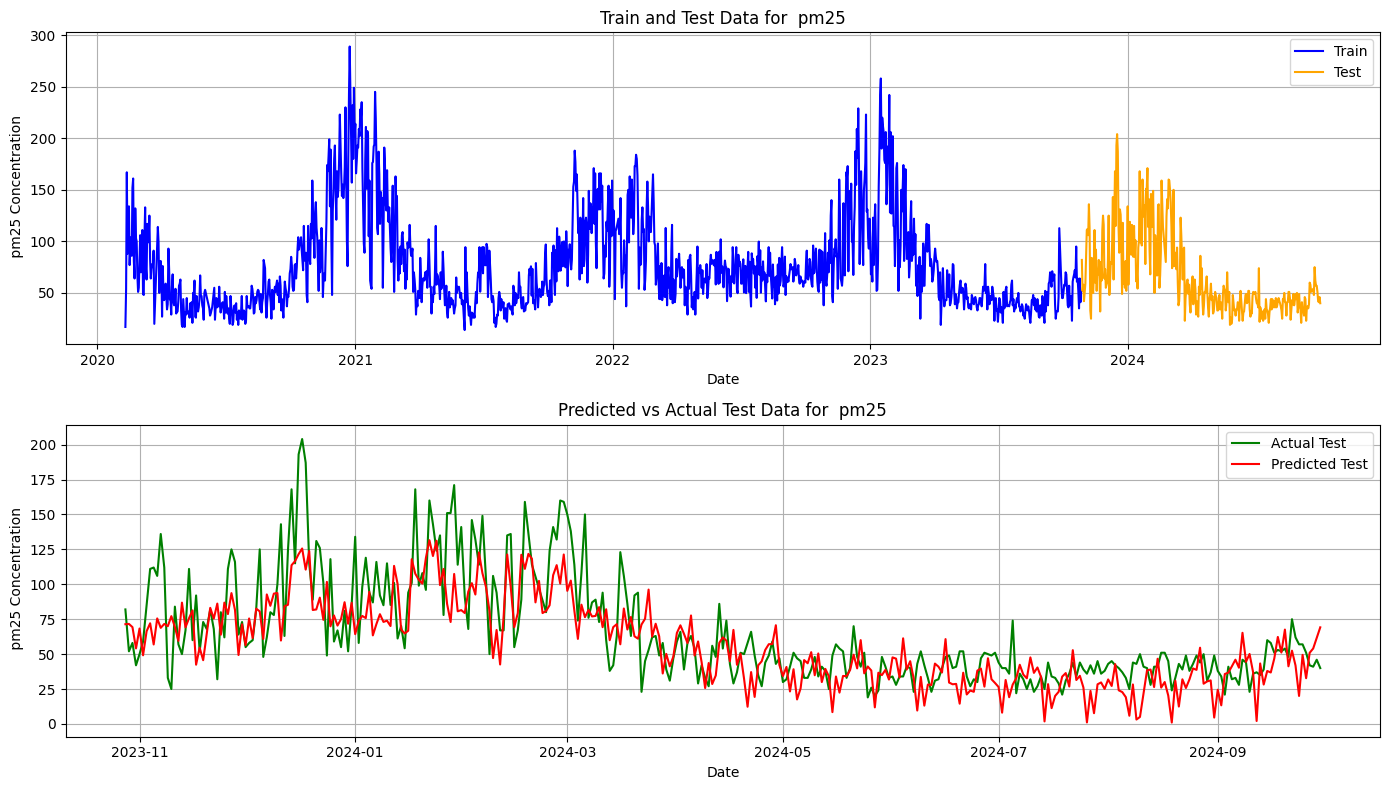


Forecasting for  pm10...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Metrics for  pm10:
MAE: 12.984676586701283, MSE: 363.98088992907367, RMSE: 19.078283201825936, R²: 0.911879961784264


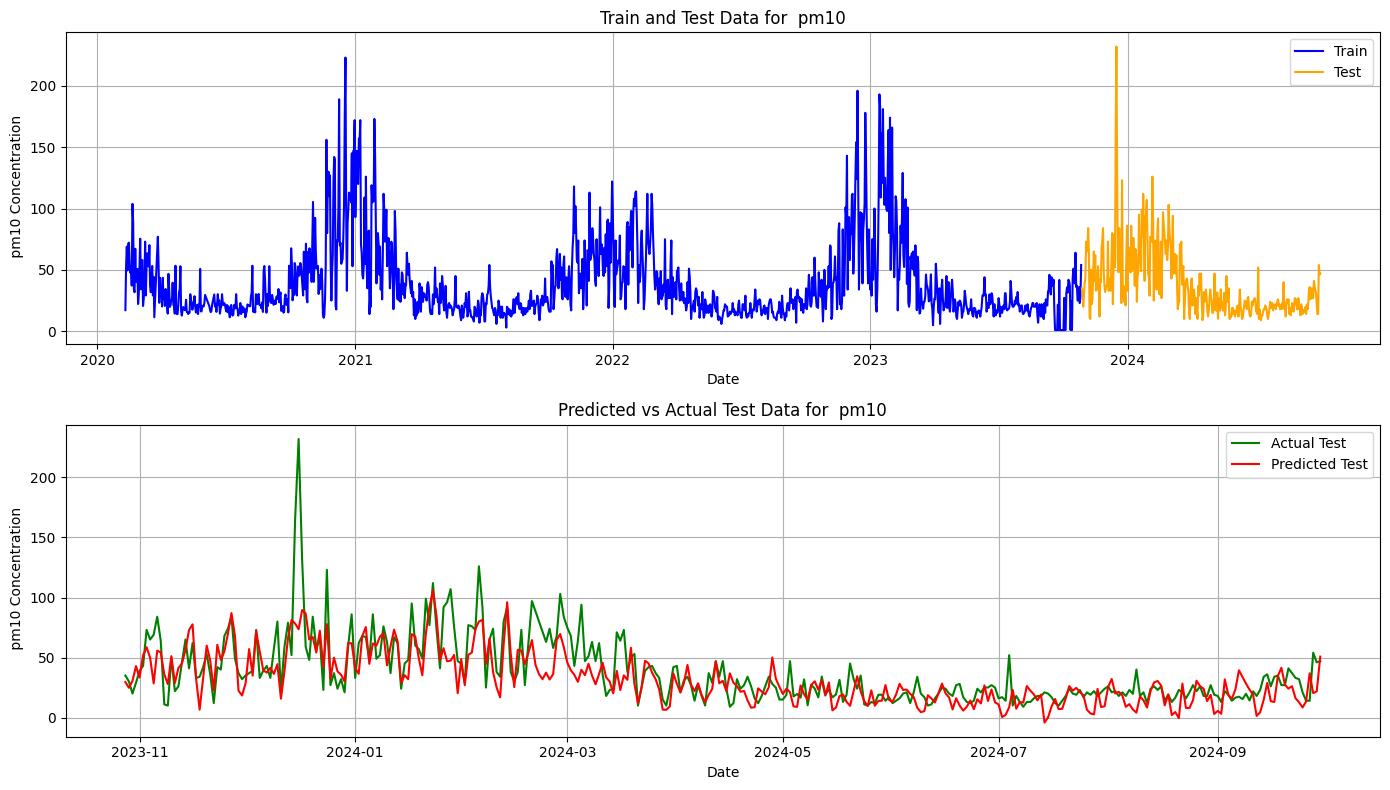

In [20]:

import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def extend_exog(exog, target_length):
    if exog is not None:
        exog_extended = exog.copy()
        while len(exog_extended) < target_length:
            last_row = exog.iloc[[-1]].copy()
            exog_extended = pd.concat([exog_extended, last_row], ignore_index=True)
        return exog_extended.iloc[:target_length]
    return None

def forecast_and_plot(series, pollutant_name, exog_columns=None):
    print(f"\nForecasting for {pollutant_name}...")

    # Prepare the data
    series = series.copy()
    series['date'] = pd.to_datetime(series['date'])
    series = series.set_index('date')
    series = series.resample('D').mean().interpolate(method='linear')

    # Train-test split (80% training, 20% testing)
    train_size = int(len(series) * 0.8)
    train, test = series[:train_size], series[train_size:]
    exog_train = train[exog_columns] if exog_columns else None
    exog_test = test[exog_columns] if exog_columns else None

    # Fit SARIMAX model
    model = SARIMAX(train[pollutant_name], exog=exog_train, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
    result = model.fit(disp=False)

    # Forecast next 365 days
    forecast_days = len(test)
    exog_test_extended = extend_exog(exog_test, forecast_days)
    forecast = result.forecast(steps=forecast_days, exog=exog_test_extended)

    # Calculate metrics
    predicted_test = result.predict(start=test.index[0], end=test.index[-1], exog=exog_test)
    mae = mean_absolute_error(test[pollutant_name], predicted_test)
    mse = mean_squared_error(test[pollutant_name], predicted_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(test[pollutant_name], predicted_test)

    print(f"Metrics for {pollutant_name}:")
    print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

    # Plot results
    plt.figure(figsize=(14, 8))

    # Subplot 1: Train and test split
    plt.subplot(2, 1, 1)
    plt.plot(train.index, train[pollutant_name], label='Train', color='blue')
    plt.plot(test.index, test[pollutant_name], label='Test', color='orange')
    plt.title(f'Train and Test Data for {pollutant_name}')
    plt.xlabel('Date')
    plt.ylabel(f'{pollutant_name} Concentration')
    plt.legend()
    plt.grid(True)

    # Subplot 2: Predicted vs Actual
    plt.subplot(2, 1, 2)
    plt.plot(test.index, test[pollutant_name], label='Actual Test', color='green')
    plt.plot(test.index, predicted_test, label='Predicted Test', color='red')
    plt.title(f'Predicted vs Actual Test Data for {pollutant_name}')
    plt.xlabel('Date')
    plt.ylabel(f'{pollutant_name} Concentration')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Apply forecasting for PM2.5 and PM10
pollutants = [' pm25', ' pm10']
# Add additional exogenous variables
exog_columns = ['temperature', 'humidity', 'wind', ' no2', ' so2', ' co']

for pollutant in pollutants:
    forecast_and_plot(merged_df[['date', pollutant] + exog_columns], pollutant, exog_columns=exog_columns)

СNN, LSTM Model

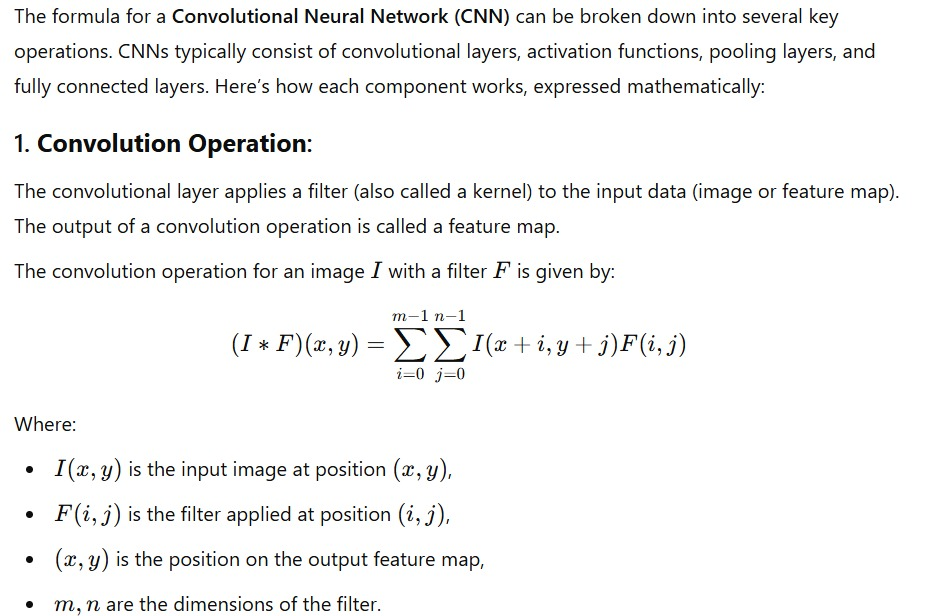

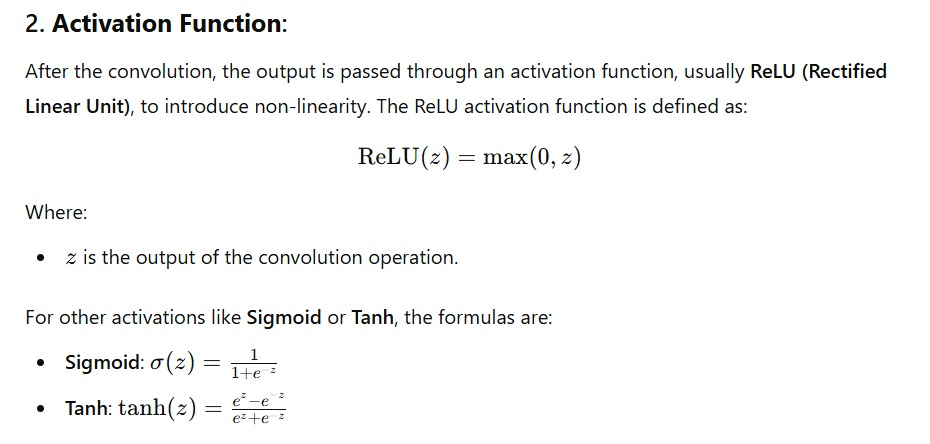

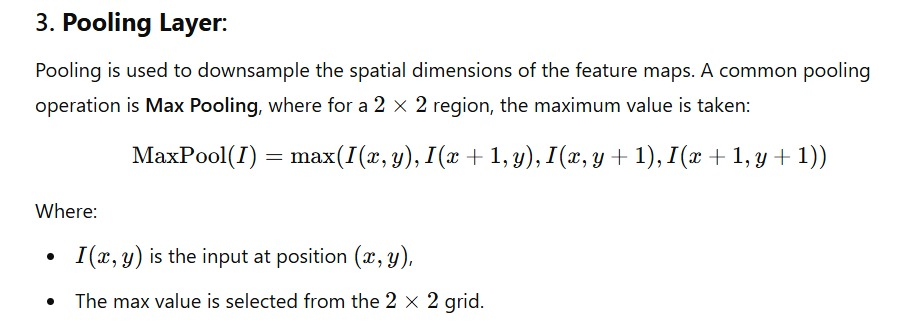

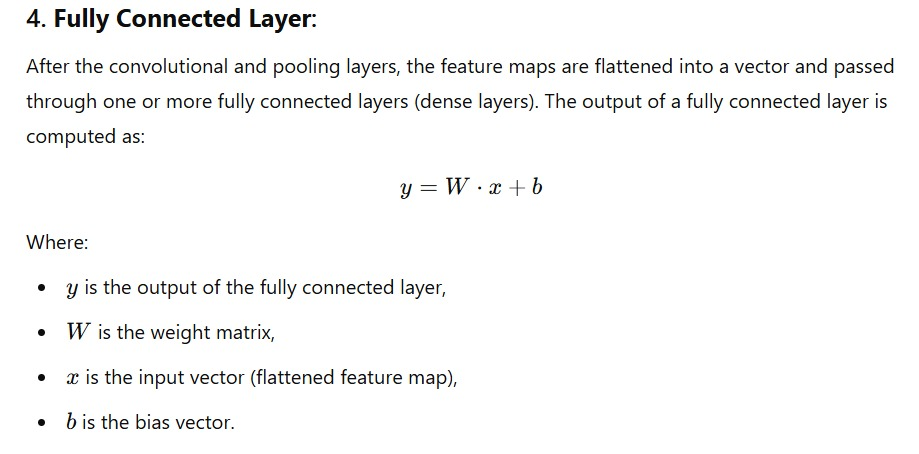

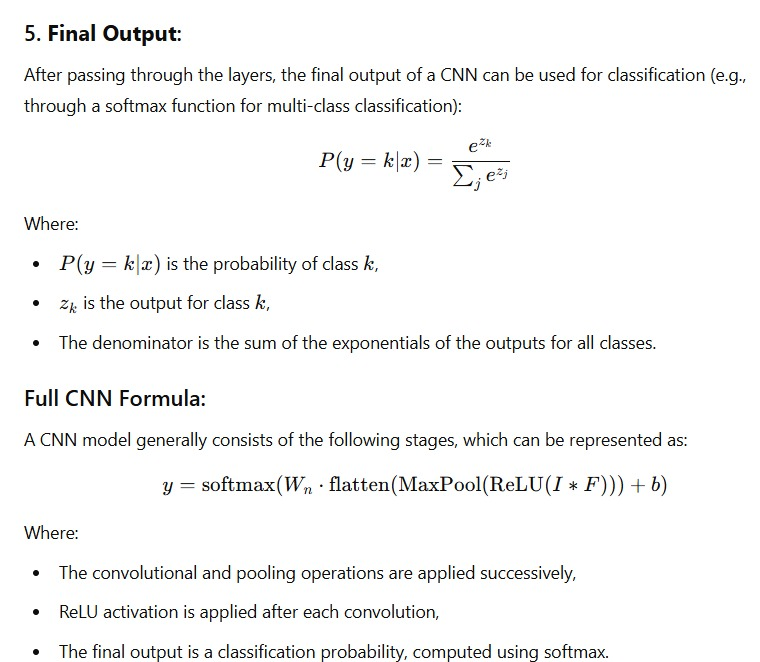

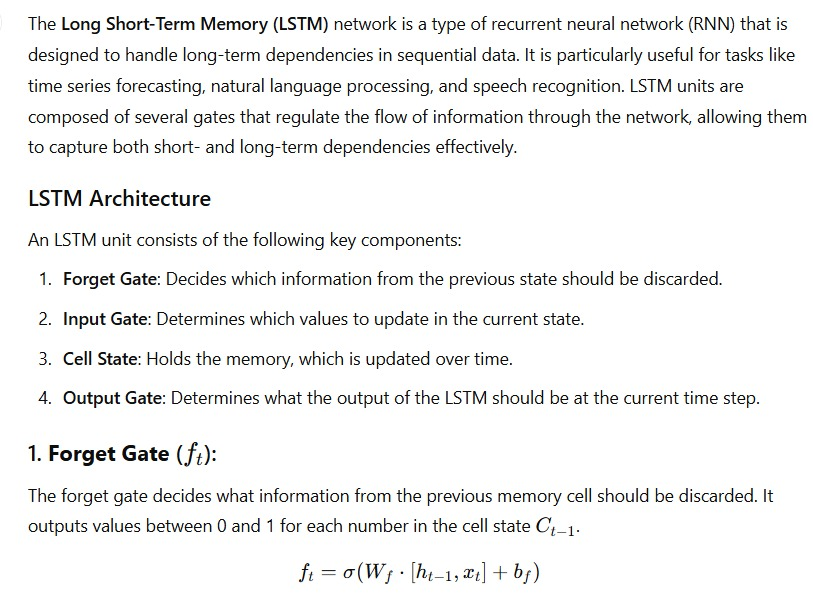

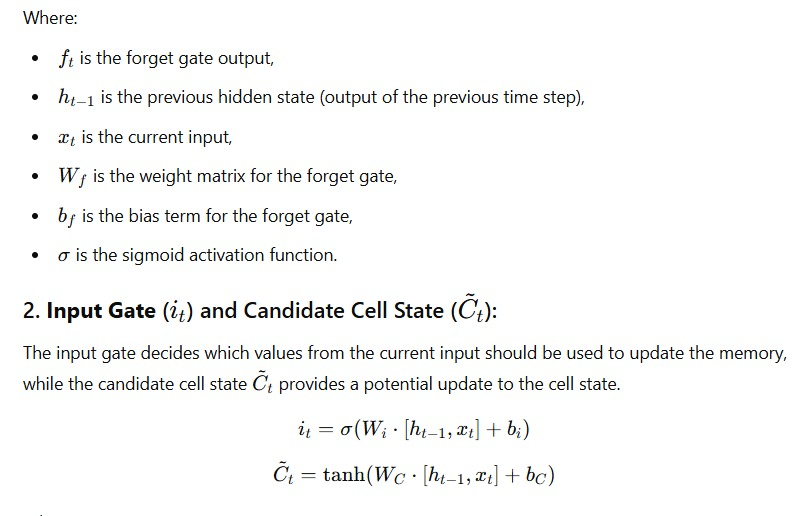

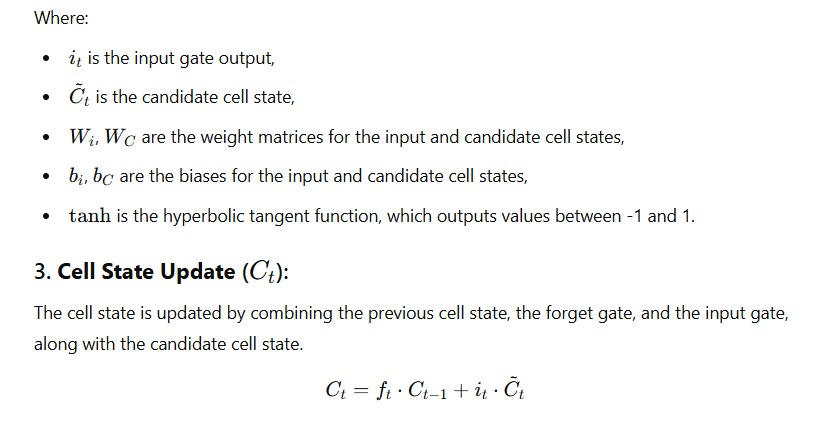

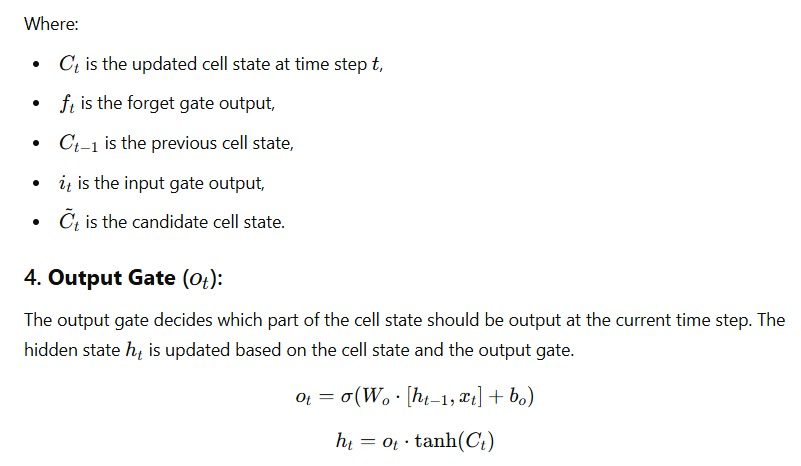

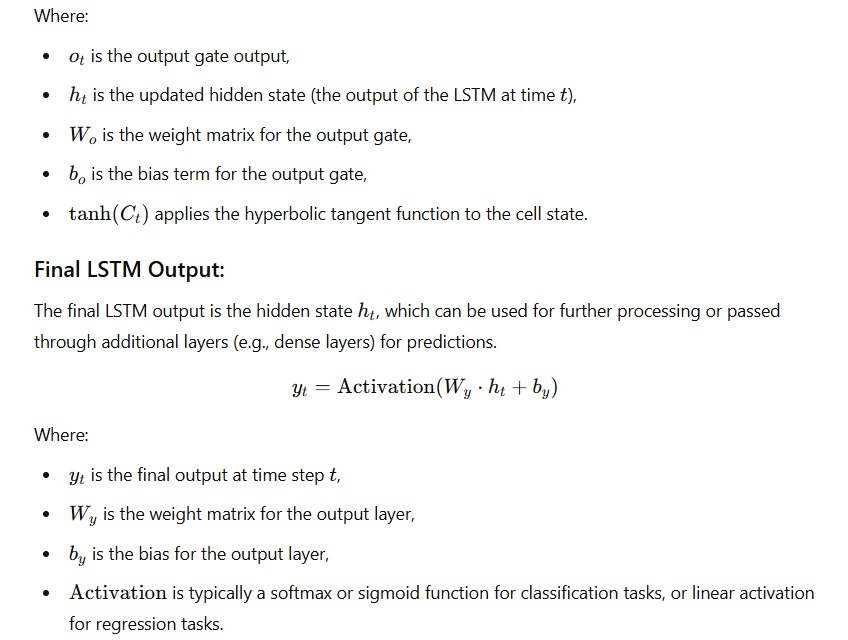

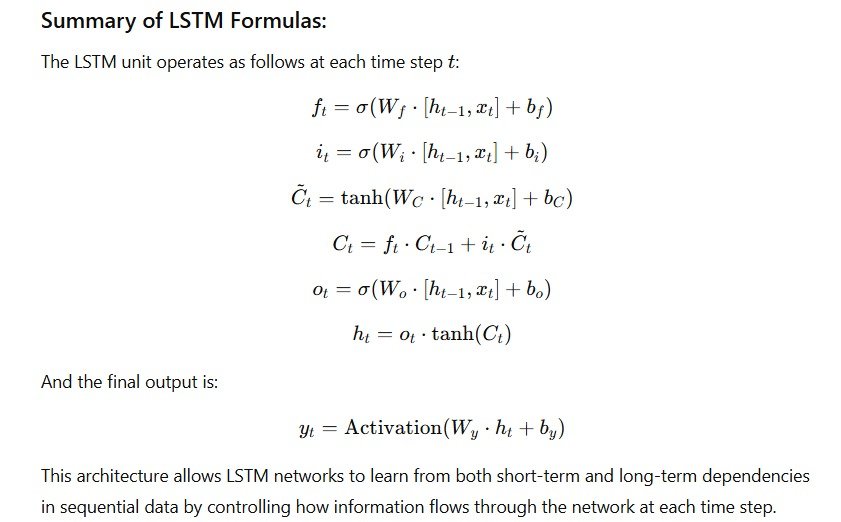


CNN Forecasting for  pm25...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0208 - mae: 0.1020 - val_loss: 0.0062 - val_mae: 0.0584
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0121 - mae: 0.0784 - val_loss: 0.0064 - val_mae: 0.0611
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0126 - mae: 0.0782 - val_loss: 0.0060 - val_mae: 0.0589
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0110 - mae: 0.0739 - val_loss: 0.0060 - val_mae: 0.0587
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0102 - mae: 0.0695 - val_loss: 0.0061 - val_mae: 0.0588
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0095 - mae: 0.0675 - val_loss: 0.0063 - val_mae: 0.0613
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0105 - mae: 0.0729 - val_loss: 0.0063 - val_mae: 0.0598
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0102 - mae: 0.0703 - val_loss: 0.0062 - val_mae: 0.0603
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0096 - mae: 0.0686 - va

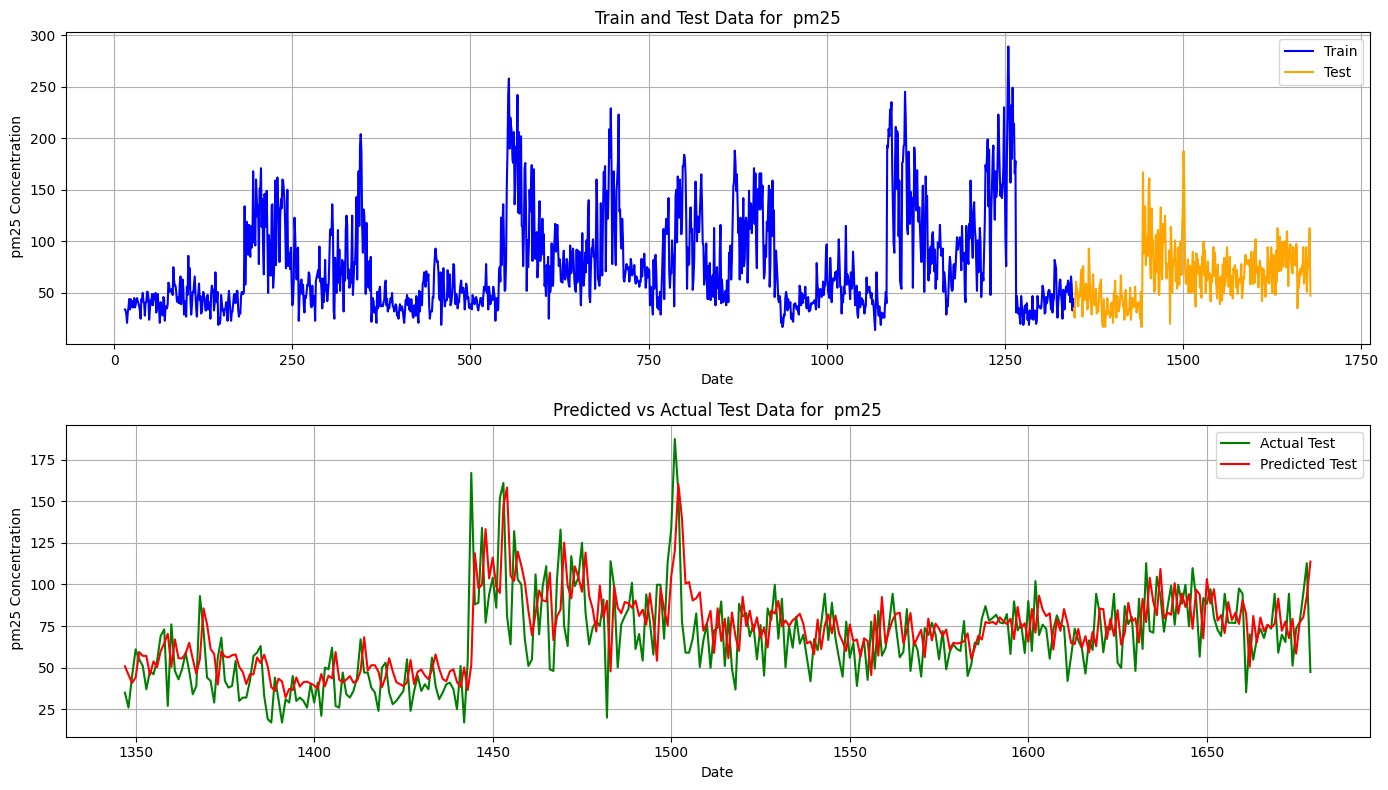


CNN Forecasting for  pm10...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0249 - mae: 0.1036 - val_loss: 0.0069 - val_mae: 0.0595
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0146 - mae: 0.0800 - val_loss: 0.0063 - val_mae: 0.0578
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0111 - mae: 0.0717 - val_loss: 0.0051 - val_mae: 0.0467
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0110 - mae: 0.0699 - val_loss: 0.0051 - val_mae: 0.0436
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0094 - mae: 0.0624 - val_loss: 0.0055 - val_mae: 0.0523
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0095 - mae: 0.0653 - val_loss: 0.0047 - val_mae: 0.0439
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0104 - mae: 0.0676 - val_loss: 0.0050 - val_mae: 0.0483
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0095 - mae: 0.0654 - val_loss: 0.0048 - val_mae: 0.0425
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0085 - mae: 0.0604 - va

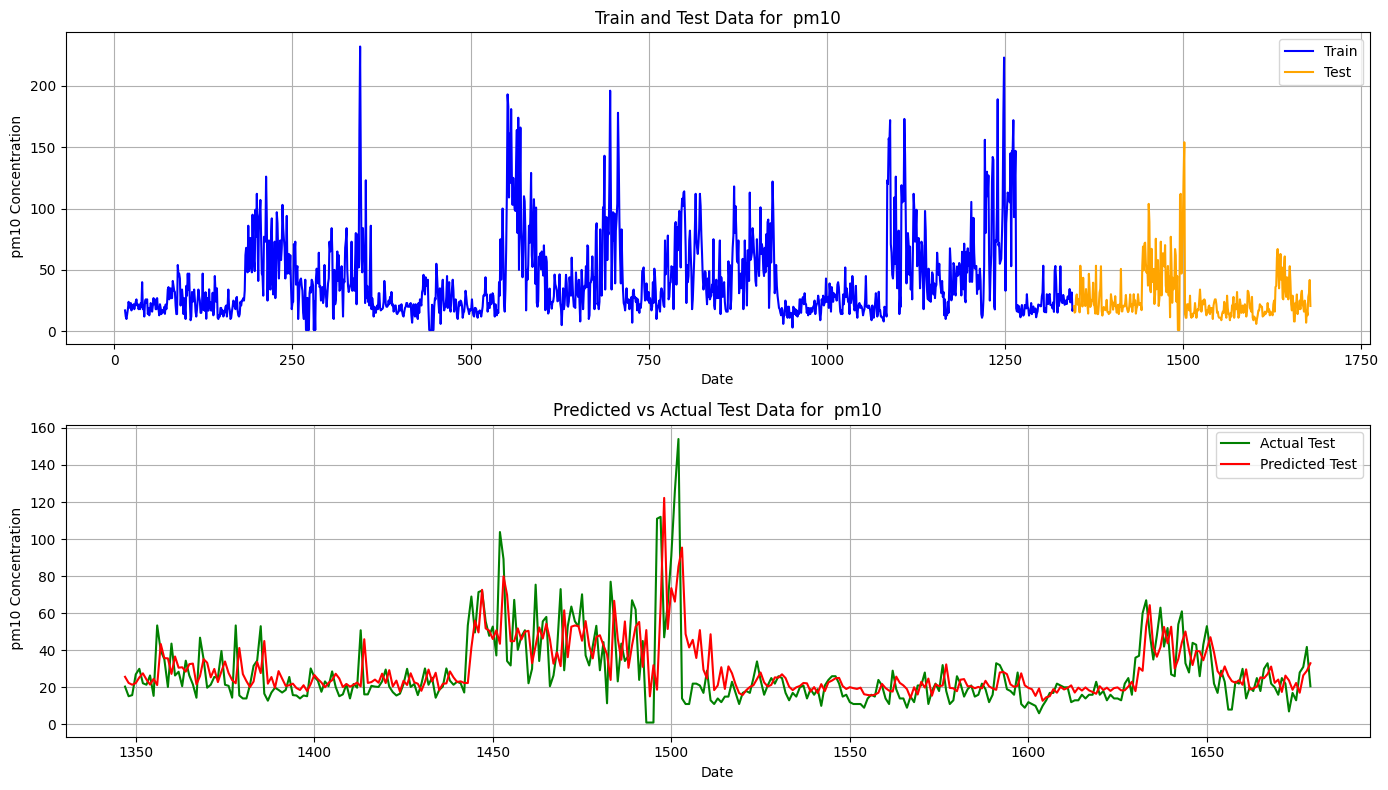


LSTM Forecasting for  pm25...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0703 - mae: 0.2029 - val_loss: 0.0116 - val_mae: 0.0900
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0200 - mae: 0.1123 - val_loss: 0.0067 - val_mae: 0.0618
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0162 - mae: 0.0897 - val_loss: 0.0067 - val_mae: 0.0594
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0166 - mae: 0.0899 - val_loss: 0.0066 - val_mae: 0.0589
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0161 - mae: 0.0874 - val_loss: 0.0065 - val_mae: 0.0604
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0156 - mae: 0.0852 - val_loss: 0.0064 - val_mae: 0.0578
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0145 - mae: 0.0843 - val_loss: 0.0064 - val_mae: 0.0601
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0128 - mae: 0.0808 - val_loss: 0.0061 - val_mae: 0.0571
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0146 - mae: 0.

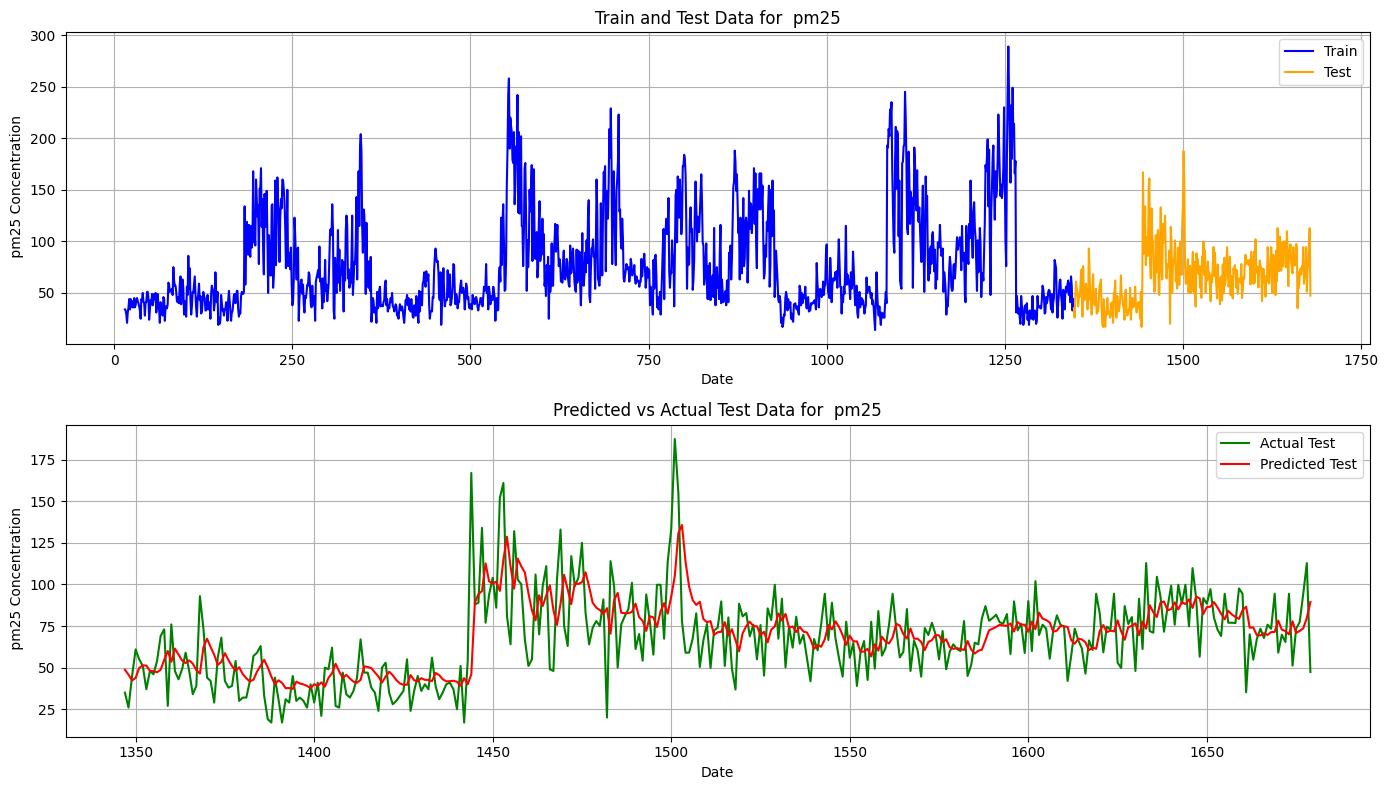


LSTM Forecasting for  pm10...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0455 - mae: 0.1562 - val_loss: 0.0123 - val_mae: 0.0996
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0170 - mae: 0.1032 - val_loss: 0.0090 - val_mae: 0.0814
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0130 - mae: 0.0825 - val_loss: 0.0060 - val_mae: 0.0518
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0129 - mae: 0.0772 - val_loss: 0.0073 - val_mae: 0.0685
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0152 - mae: 0.0841 - val_loss: 0.0061 - val_mae: 0.0567
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0135 - mae: 0.0789 - val_loss: 0.0060 - val_mae: 0.0551
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0134 - mae: 0.0804 - val_loss: 0.0057 - val_mae: 0.0507
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0121 - mae: 0.0748 - val_loss: 0.0061 - val_mae: 0.0574
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0119 - mae: 0.

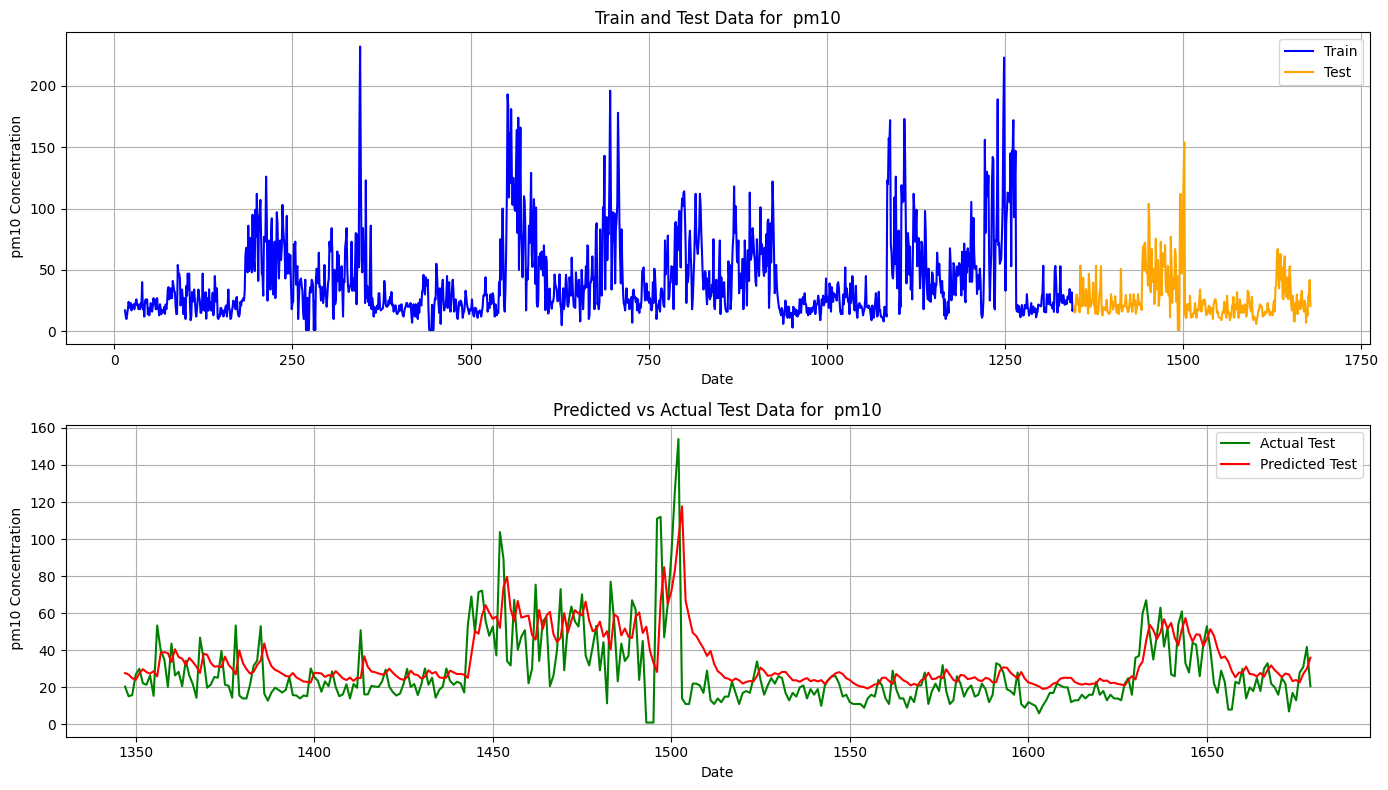

In [99]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, LSTM, Dropout, Flatten

# Preprocessing function
def preprocess_data(series, n_steps=15):
    scaler = MinMaxScaler()
    scaled_series = scaler.fit_transform(series.values.reshape(-1, 1))

    X, y = [], []
    for i in range(len(scaled_series) - n_steps):
        X.append(scaled_series[i:i + n_steps])
        y.append(scaled_series[i + n_steps])

    return np.array(X), np.array(y), scaler

# CNN Model
def cnn_model(X_train, y_train, X_test, y_test, n_steps):
    model = Sequential([
        Conv1D(filters=15, kernel_size=2, activation='relu', input_shape=(n_steps, 1)),
        Flatten(),
        Dense(4, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    return model

# LSTM Model
def lstm_model(X_train, y_train, X_test, y_test, n_steps):
    model = Sequential([
        LSTM(25, activation='relu', input_shape=(n_steps, 1), return_sequences=True),
        Dropout(0.2),
        LSTM(25, activation='relu'),
        Dense(4, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    return model

# Forecast and Visualization
def forecast_and_visualize(series, pollutant_name, model_type="CNN", n_steps=15):
    print(f"\n{model_type} Forecasting for {pollutant_name}...")

    # Preprocess data
    X, y, scaler = preprocess_data(series[[pollutant_name]], n_steps)

    # Train-test split
    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Reshape for the model
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build and train model
    if model_type == "CNN":
        model = cnn_model(X_train, y_train, X_test, y_test, n_steps)
    elif model_type == "LSTM":
        model = lstm_model(X_train, y_train, X_test, y_test, n_steps)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Extract dates for plotting
    date_index = series.index[n_steps:]
    train_dates = date_index[:train_size]
    test_dates = date_index[train_size:]

    # Calculate metrics
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    mse = mean_squared_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_inv, y_pred_inv)

    print(f"Metrics for {pollutant_name} ({model_type}):")
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2}")

    # Visualization
    plt.figure(figsize=(14, 8))

    # Subplot 1: Train and Test Data
    plt.subplot(2, 1, 1)
    plt.plot(train_dates, y_train_inv, label='Train', color='blue')
    plt.plot(test_dates, y_test_inv, label='Test', color='orange')
    plt.title(f'Train and Test Data for {pollutant_name}')
    plt.xlabel('Date')
    plt.ylabel(f'{pollutant_name} Concentration')
    plt.legend()
    plt.grid(True)

    # Subplot 2: Predicted vs Actual Test Data
    plt.subplot(2, 1, 2)
    plt.plot(test_dates, y_test_inv, label='Actual Test', color='green')
    plt.plot(test_dates, y_pred_inv, label='Predicted Test', color='red')
    plt.title(f'Predicted vs Actual Test Data for {pollutant_name}')
    plt.xlabel('Date')
    plt.ylabel(f'{pollutant_name} Concentration')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

forecast_and_visualize(merged_df2, ' pm25', model_type="CNN")
forecast_and_visualize(merged_df2, ' pm10', model_type="CNN")

forecast_and_visualize(merged_df2, ' pm25', model_type="LSTM")
forecast_and_visualize(merged_df2, ' pm10', model_type="LSTM")


**Metrics**

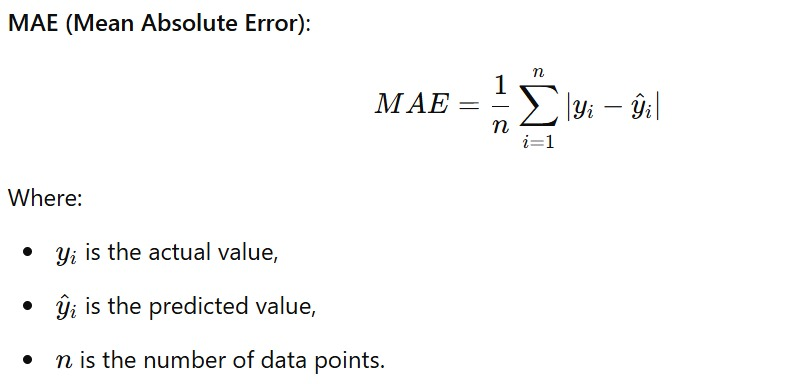

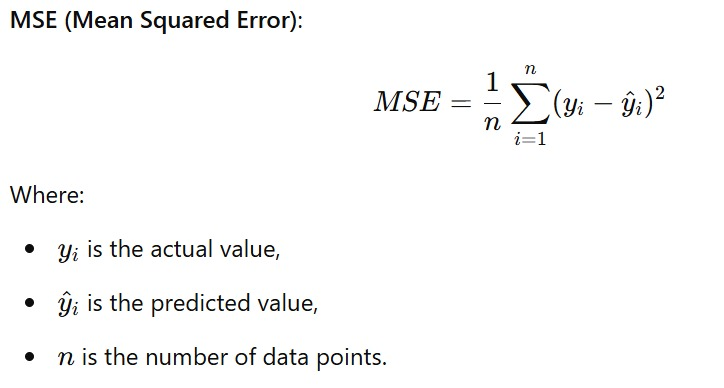

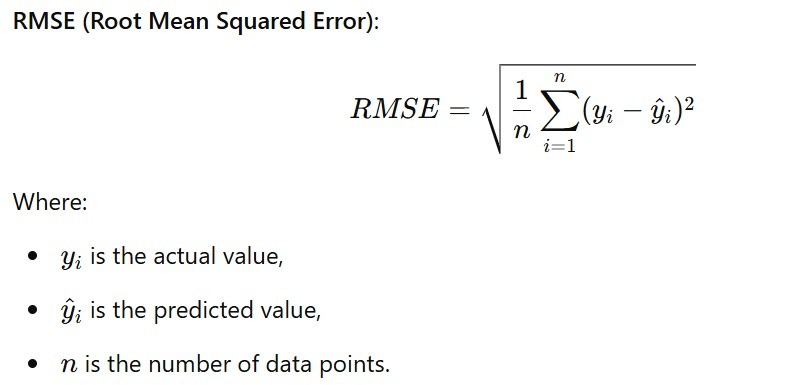

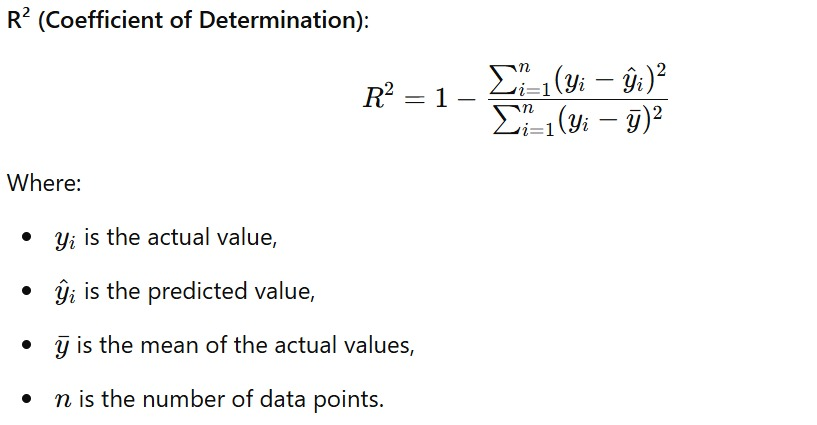

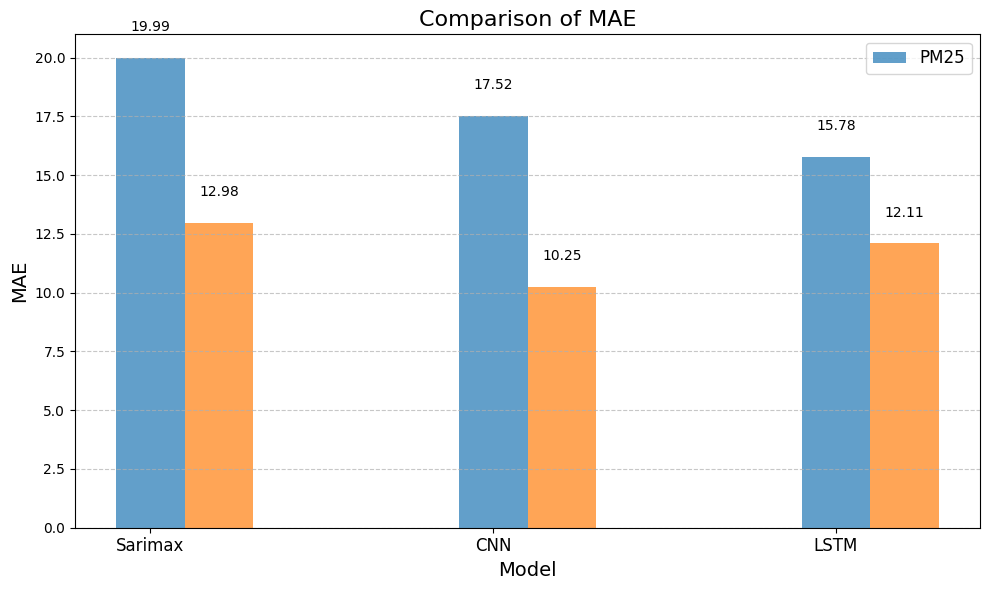

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics from each model
metrics = {
    'Sarimax': {
        'pm25': {'MAE': 19.99, 'MSE': 675.67, 'RMSE': 25.99, 'R²': 0.91},
        'pm10': {'MAE': 12.98, 'MSE': 363.98, 'RMSE': 19.08, 'R²': 0.91}
    },
    'CNN': {
        'pm25': {'MAE': 17.52, 'MSE': 517.66, 'RMSE': 22.75, 'R²': 0.75},
        'pm10': {'MAE': 10.25, 'MSE': 259.99, 'RMSE': 16.12, 'R²': 0.82}
    },
    'LSTM': {
        'pm25': {'MAE': 15.78, 'MSE': 442.50, 'RMSE': 21.04, 'R²': 0.86},
        'pm10': {'MAE': 12.11, 'MSE': 291.25, 'RMSE': 17.07, 'R²': 0.73}
    }
}

# Function to plot MAE
def plot_mae(metrics):
    models = ['Sarimax', 'CNN', 'LSTM']
    pollutants = ['pm25', 'pm10']

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Comparison of MAE', fontsize=16)
    ax.set_xlabel('Model', fontsize=14)
    ax.set_ylabel('MAE', fontsize=14)

    for i, pollutant in enumerate(pollutants):
        mae_values = [metrics[model][pollutant]['MAE'] for model in models]
        x = np.arange(len(models)) + i * 0.2  # Offset for each pollutant
        bars = ax.bar(x, mae_values, width=0.2, label=f'{pollutant.upper()}' if i == 0 else "", alpha=0.7)

        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

    ax.set_xticks(np.arange(len(models)))
    ax.set_xticklabels(models, fontsize=12)
    ax.legend(fontsize=12)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Plot MAE
plot_mae(metrics)


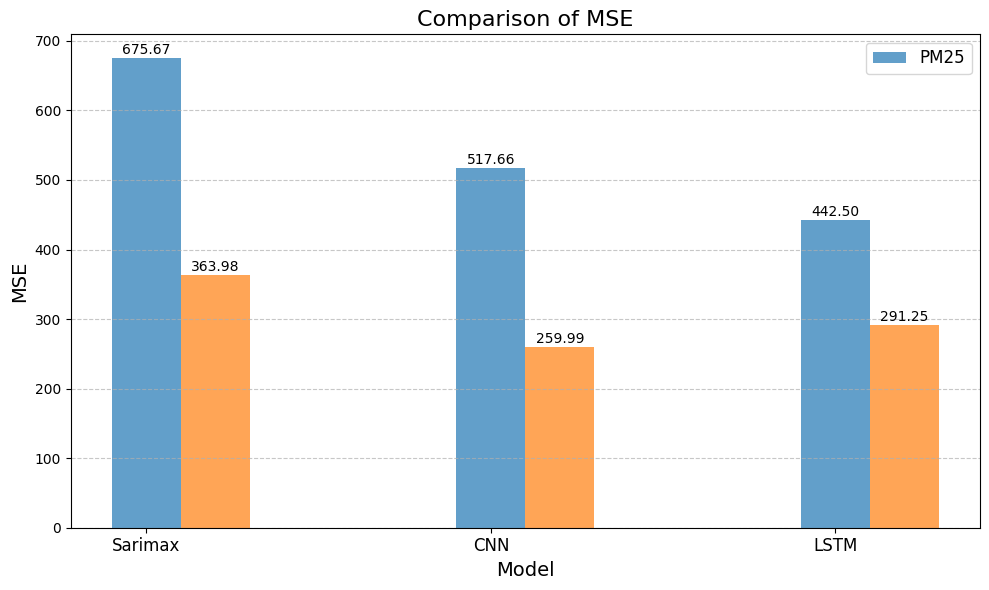

In [113]:
# Function to plot MSE
def plot_mse(metrics):
    models = ['Sarimax', 'CNN', 'LSTM']
    pollutants = ['pm25', 'pm10']

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Comparison of MSE', fontsize=16)
    ax.set_xlabel('Model', fontsize=14)
    ax.set_ylabel('MSE', fontsize=14)

    for i, pollutant in enumerate(pollutants):
        mse_values = [metrics[model][pollutant]['MSE'] for model in models]
        x = np.arange(len(models)) + i * 0.2  # Offset for each pollutant
        bars = ax.bar(x, mse_values, width=0.2, label=f'{pollutant.upper()}' if i == 0 else "", alpha=0.7)

        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

    ax.set_xticks(np.arange(len(models)))
    ax.set_xticklabels(models, fontsize=12)
    ax.legend(fontsize=12)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Plot MSE
plot_mse(metrics)


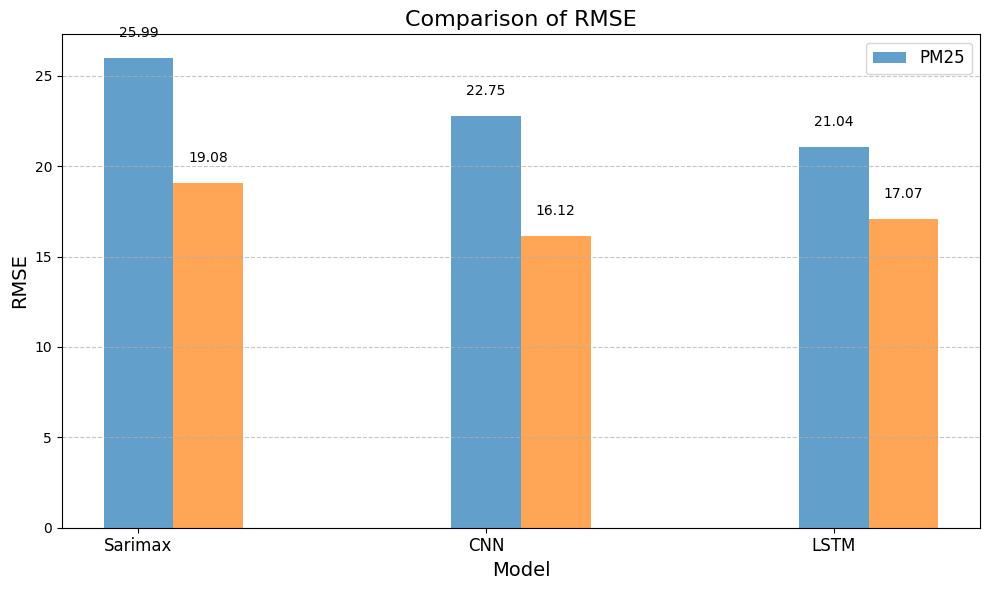

In [114]:
# Function to plot RMSE
def plot_rmse(metrics):
    models = ['Sarimax', 'CNN', 'LSTM']
    pollutants = ['pm25', 'pm10']

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Comparison of RMSE', fontsize=16)
    ax.set_xlabel('Model', fontsize=14)
    ax.set_ylabel('RMSE', fontsize=14)

    for i, pollutant in enumerate(pollutants):
        rmse_values = [metrics[model][pollutant]['RMSE'] for model in models]
        x = np.arange(len(models)) + i * 0.2  # Offset for each pollutant
        bars = ax.bar(x, rmse_values, width=0.2, label=f'{pollutant.upper()}' if i == 0 else "", alpha=0.7)

        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

    ax.set_xticks(np.arange(len(models)))
    ax.set_xticklabels(models, fontsize=12)
    ax.legend(fontsize=12)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Plot RMSE
plot_rmse(metrics)


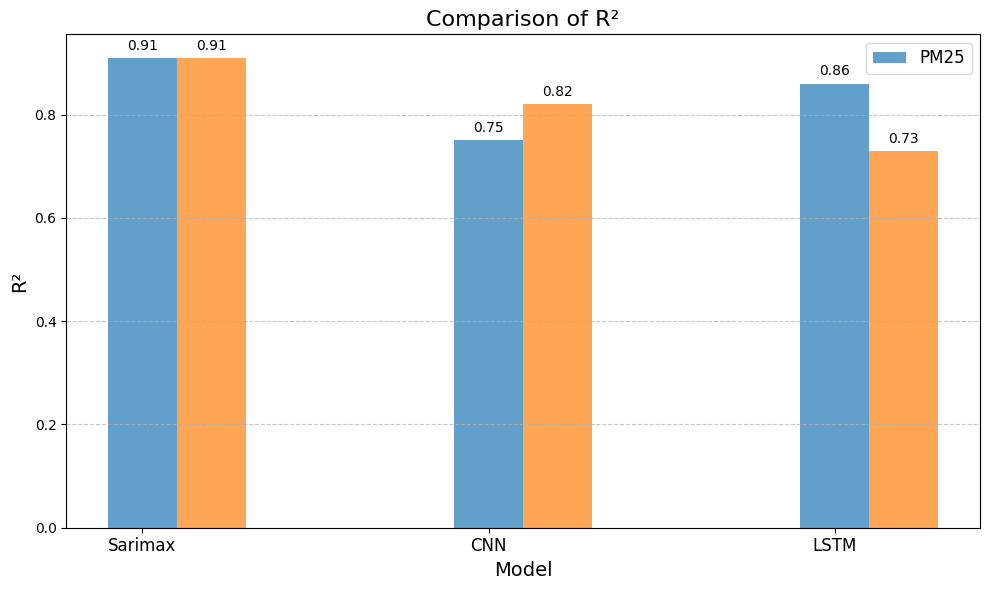

In [115]:
# Function to plot R²
def plot_r2(metrics):
    models = ['Sarimax', 'CNN', 'LSTM']
    pollutants = ['pm25', 'pm10']

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Comparison of R²', fontsize=16)
    ax.set_xlabel('Model', fontsize=14)
    ax.set_ylabel('R²', fontsize=14)

    for i, pollutant in enumerate(pollutants):
        r2_values = [metrics[model][pollutant]['R²'] for model in models]
        r2_values = [min(r, 1) for r in r2_values]  # Limit values to a maximum of 1
        x = np.arange(len(models)) + i * 0.2  # Offset for each pollutant
        bars = ax.bar(x, r2_values, width=0.2, label=f'{pollutant.upper()}' if i == 0 else "", alpha=0.7)

        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

    ax.set_xticks(np.arange(len(models)))
    ax.set_xticklabels(models, fontsize=12)
    ax.legend(fontsize=12)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Plot R²
plot_r2(metrics)


**Conclusion**

Among the models evaluated, SARIMAX outperformed both CNN and LSTM models in predicting pollutant concentrations. While CNN-LSTM showed slightly better results in some areas, SARIMAX proved to be more effective overall due to its ability to account for seasonal patterns and incorporate exogenous variables. These factors significantly improved the prediction accuracy, making SARIMAX the preferred choice for time-series forecasting in this context.